## Importar Librerias

In [347]:
import datetime
from dateutil.relativedelta import relativedelta
import tensorflow
import seaborn as sns 
import scipy
from datetime import datetime, timedelta,date
import pandas as pd
from pandas import Grouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from math import sqrt, exp
from statistics import mean
import statsmodels.api as sm

from dateutil.relativedelta import relativedelta

import warnings
#warnings.filterwarnings("ignore")

import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM


# Importar tensorflow
import tensorflow as tf

# Importar statsmodels.formula.api
import statsmodels.formula.api as smf

#model metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#cross validation
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#get your parameters right
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.api import ProbPlot
from statsmodels.graphics import tsaplots
from statsmodels.stats.stattools import jarque_bera as jb
from statsmodels.stats.diagnostic import acorr_ljungbox as lb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from scipy import stats
from scipy.stats import kstest, boxcox, gaussian_kde, norm

In [348]:
#iniciar trama
pyoff.init_notebook_mode()

## Cargar Conjunto de Datos

In [349]:
#leer los datos en csv
df_primas = pd.read_csv('/Users/ariasrodriguez/Documents/GitHub/Data_Analytics-Big_Data/Task 5.4/Anexos/mercadoPrimaMensual.csv')
df_primas.columns = ['fecha','codLinea','codAseguradora','primaMensual']
df_primas.head(10)

fecha  codLinea  codAseguradora  primaMensual
0  2010-01-01 00:00:00.000        10               1     9230.6989
1  2010-01-01 00:00:00.000         4               1     4627.3145
2  2010-01-01 00:00:00.000         4               4       42.7470
3  2010-01-01 00:00:00.000        18               1      115.2261
4  2010-01-01 00:00:00.000        19               1     2033.5397
5  2010-01-01 00:00:00.000        12               1        5.5203
6  2010-01-01 00:00:00.000         8               1     4076.6290
7  2010-01-01 00:00:00.000         3               1       16.9358
8  2010-01-01 00:00:00.000        17               1     1283.8624
9  2010-01-01 00:00:00.000        13               1    -1087.2790

### Depurar conjunto de Datos

In [350]:
#convertir campo de fecha de cadena a fecha y hora
df_primas['fecha'] = pd.to_datetime(df_primas['fecha'])
df_primas.head(10)

fecha  codLinea  codAseguradora  primaMensual
0 2010-01-01        10               1     9230.6989
1 2010-01-01         4               1     4627.3145
2 2010-01-01         4               4       42.7470
3 2010-01-01        18               1      115.2261
4 2010-01-01        19               1     2033.5397
5 2010-01-01        12               1        5.5203
6 2010-01-01         8               1     4076.6290
7 2010-01-01         3               1       16.9358
8 2010-01-01        17               1     1283.8624
9 2010-01-01        13               1    -1087.2790

### Explorar Datos 

In [351]:
df_primas[['fecha', 'codLinea', 'codAseguradora','primaMensual']].describe()

codLinea  codAseguradora   primaMensual
count  7257.000000     7257.000000    7257.000000
mean     10.238391        5.419319     959.806042
std       5.610860        4.119544    3988.200266
min       1.000000        1.000000  -31924.013800
25%       5.000000        1.000000      15.304600
50%      10.000000        4.000000     105.590000
75%      15.000000        9.000000     501.325900
max      24.000000       14.000000  159360.781359

In [8]:
aseguradoras = df_primas.groupby(['codAseguradora', 'codLinea']).size().unstack(1)
aseguradoras

codLinea          1      2      3      4      5      6     7      8      9   \
codAseguradora                                                                
1               61.0  120.0  121.0  121.0  121.0  121.0   NaN  121.0  121.0   
2               61.0    NaN    NaN  101.0    2.0    NaN   NaN    NaN   91.0   
3               61.0    NaN    NaN   71.0   78.0   35.0  38.0  114.0   49.0   
4                NaN    NaN    NaN  121.0    NaN    NaN   NaN    NaN    NaN   
5               61.0    NaN    NaN   92.0    NaN    NaN   NaN    NaN    NaN   
6                NaN    NaN   27.0    NaN   72.0    NaN   NaN   77.0   11.0   
7                NaN    NaN    NaN   29.0    NaN    NaN   NaN    NaN    NaN   
8               61.0    NaN    8.0   95.0    8.0    NaN   NaN  107.0    7.0   
9               61.0    NaN    NaN   62.0    NaN    NaN   NaN   59.0   67.0   
10              61.0    NaN    NaN   98.0    NaN    NaN   NaN    NaN    NaN   
11              61.0    NaN    NaN  110.0    NaN    NaN   NaN    NaN    NaN   
12               NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
13               NaN    NaN   44.0    NaN    NaN    NaN   NaN   61.0    NaN   
14               NaN    NaN    NaN   27.0    NaN    NaN   NaN   62.0   62.0   

codLinea           10  ...     12     13   14    15     16     17    18  \
codAseguradora         ...                                                
1               121.0  ...  121.0  121.0  1.0  61.0  121.0  121.0  48.0   
2                 NaN  ...   54.0    NaN  NaN  61.0    NaN    NaN   NaN   
3               108.0  ...  112.0  107.0  NaN  35.0    NaN  114.0  37.0   
4                 NaN  ...    NaN    NaN  NaN  61.0    NaN    NaN   NaN   
5                 NaN  ...    NaN    NaN  NaN   NaN    NaN    NaN   NaN   
6                79.0  ...   75.0   12.0  NaN   NaN    NaN   69.0   NaN   
7                 NaN  ...    NaN    NaN  NaN   NaN    NaN    NaN   NaN   
8               117.0  ...  100.0   72.0  NaN   NaN    NaN   79.0   NaN   
9                 NaN  ...   78.0   40.0  NaN  60.0    NaN    NaN   NaN   
10                NaN  ...    NaN    NaN  NaN   NaN    NaN    NaN   NaN   
11                NaN  ...    NaN    NaN  NaN   NaN    NaN    NaN   NaN   
12              104.0  ...    NaN    NaN  NaN   NaN    NaN    NaN   NaN   
13               61.0  ...   60.0   23.0  NaN   NaN    NaN   61.0   NaN   
14                NaN  ...    6.0    NaN  NaN  27.0    NaN    NaN   NaN   

codLinea           19   23   24  
codAseguradora                   
1               121.0  2.0  2.0  
2               101.0  NaN  NaN  
3                85.0  NaN  NaN  
4               121.0  NaN  NaN  
5                51.0  NaN  NaN  
6                 NaN  NaN  NaN  
7                29.0  NaN  NaN  
8                95.0  NaN  NaN  
9                82.0  NaN  NaN  
10               86.0  NaN  NaN  
11              110.0  NaN  NaN  
12                NaN  NaN  NaN  
13                NaN  NaN  NaN  
14              101.0  NaN  NaN  

[14 rows x 21 columns]

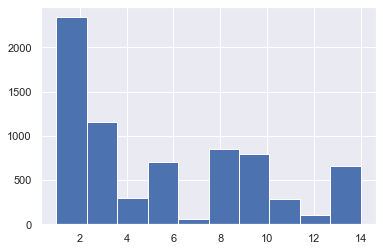

In [352]:
df_primas.codAseguradora.hist()

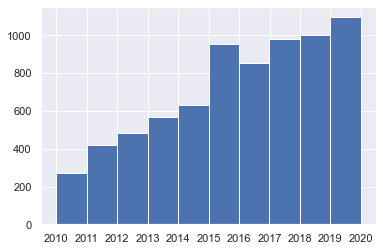

In [353]:
df_primas.fecha.hist()

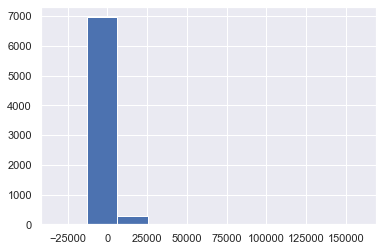

In [354]:
df_primas.primaMensual.hist()

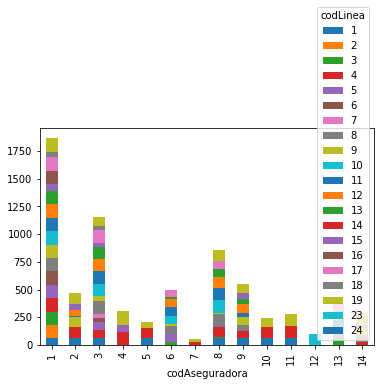

In [99]:
aseguradoras.plot(kind='bar', stacked = True)

In [113]:
isAseguradora1 = df_primas.codAseguradora == 1
isAseguradora2 = df_primas.codAseguradora == 2
isAseguradora3 = df_primas.codAseguradora == 3
isAseguradora4 = df_primas.codAseguradora == 4
isAseguradora5 = df_primas.codAseguradora == 5
isAseguradora6 = df_primas.codAseguradora == 6
isAseguradora7 = df_primas.codAseguradora == 7
isAseguradora8 = df_primas.codAseguradora == 8
isAseguradora9 = df_primas.codAseguradora == 9
isAseguradora10 = df_primas.codAseguradora == 10
isAseguradora11 = df_primas.codAseguradora == 11
isAseguradora12 = df_primas.codAseguradora == 12
isAseguradora13 = df_primas.codAseguradora == 13
isAseguradora14 = df_primas.codAseguradora == 14

In [114]:
df_Aseguradora1 = df_primas[isAseguradora1].copy()
df_Aseguradora2 = df_primas[isAseguradora2].copy()
df_Aseguradora3 = df_primas[isAseguradora3].copy()
df_Aseguradora4 = df_primas[isAseguradora4].copy()
df_Aseguradora5 = df_primas[isAseguradora5].copy()
df_Aseguradora6 = df_primas[isAseguradora6].copy()
df_Aseguradora7 = df_primas[isAseguradora7].copy()
df_Aseguradora8 = df_primas[isAseguradora8].copy()
df_Aseguradora9 = df_primas[isAseguradora9].copy()
df_Aseguradora10 = df_primas[isAseguradora10].copy()
df_Aseguradora11 = df_primas[isAseguradora11].copy()
df_Aseguradora12 = df_primas[isAseguradora12].copy()
df_Aseguradora13 = df_primas[isAseguradora13].copy()
df_Aseguradora14 = df_primas[isAseguradora13].copy()

In [115]:
print('Aseguradora #1: ',str(len(df_Aseguradora1.index)))
print('Aseguradora #2: ',str(len(df_Aseguradora2.index)))
print('Aseguradora #3: ',str(len(df_Aseguradora3.index)))
print('Aseguradora #4: ',str(len(df_Aseguradora4.index)))
print('Aseguradora #5: ',str(len(df_Aseguradora5.index)))
print('Aseguradora #6: ',str(len(df_Aseguradora6.index)))
print('Aseguradora #7: ',str(len(df_Aseguradora7.index)))
print('Aseguradora #8: ',str(len(df_Aseguradora8.index)))
print('Aseguradora #9: ',str(len(df_Aseguradora9.index)))
print('Aseguradora #10: ',str(len(df_Aseguradora10.index)))
print('Aseguradora #11: ',str(len(df_Aseguradora11.index)))
print('Aseguradora #12: ',str(len(df_Aseguradora12.index)))
print('Aseguradora #13: ',str(len(df_Aseguradora13.index)))
print('Aseguradora #14: ',str(len(df_Aseguradora14.index)))

Aseguradora #1:  1868
Aseguradora #2:  474
Aseguradora #3:  1157
Aseguradora #4:  303
Aseguradora #5:  204
Aseguradora #6:  499
Aseguradora #7:  58
Aseguradora #8:  857
Aseguradora #9:  553
Aseguradora #10:  245
Aseguradora #11:  281
Aseguradora #12:  104
Aseguradora #13:  369
Aseguradora #14:  369


## Transformación de los datos

#### Es necesario agrupar mensualmente los datos y resumir la columna de primas.

In [355]:
df_primas.head(10)

fecha  codLinea  codAseguradora  primaMensual
0 2010-01-01        10               1     9230.6989
1 2010-01-01         4               1     4627.3145
2 2010-01-01         4               4       42.7470
3 2010-01-01        18               1      115.2261
4 2010-01-01        19               1     2033.5397
5 2010-01-01        12               1        5.5203
6 2010-01-01         8               1     4076.6290
7 2010-01-01         3               1       16.9358
8 2010-01-01        17               1     1283.8624
9 2010-01-01        13               1    -1087.2790

In [13]:
df_Aseguradora1.head(10)

fecha  codLinea  codAseguradora  primaMensual
0  2010-01-01        10               1     9230.6989
1  2010-01-01         4               1     4627.3145
3  2010-01-01        18               1      115.2261
4  2010-01-01        19               1     2033.5397
5  2010-01-01        12               1        5.5203
6  2010-01-01         8               1     4076.6290
7  2010-01-01         3               1       16.9358
8  2010-01-01        17               1     1283.8624
9  2010-01-01        13               1    -1087.2790
11 2010-01-01        16               1       27.4482

In [356]:
#representa el mes en el campo de fecha como su primer día
df_Aseguradora1['fecha'] = df_Aseguradora1['fecha'].dt.year.astype('str') + '-' + df_Aseguradora1['fecha'].dt.month.astype('str') + '-01'
df_Aseguradora1['fecha'] = pd.to_datetime(df_Aseguradora1['fecha'])
#fecha grupal y suma las ventas
df_Aseguradora1 = df_Aseguradora1.groupby('fecha').primaMensual.sum().reset_index()
df_Aseguradora1.head(10)

fecha  primaMensual
0 2010-01-01    22078.1727
1 2010-02-01    39191.8354
2 2010-03-01    26157.2038
3 2010-04-01    21252.8475
4 2010-05-01    32199.6088
5 2010-06-01    30503.4787
6 2010-07-01    29581.1155
7 2010-08-01    31419.6212
8 2010-09-01    23001.3942
9 2010-10-01    23719.4476

In [14]:
df_Aseguradora1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
fecha           121 non-null datetime64[ns]
primaMensual    121 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [15]:
df_Aseguradora1[['fecha']].describe()

fecha
count                   121
unique                  121
top     2010-05-01 00:00:00
freq                      1
first   2010-01-01 00:00:00
last    2020-01-01 00:00:00

In [357]:
#representa el mes en el campo de fecha como su primer día
df_Aseguradora2['fecha'] = df_Aseguradora2['fecha'].dt.year.astype('str') + '-' + df_Aseguradora2['fecha'].dt.month.astype('str') + '-01'
df_Aseguradora2['fecha'] = pd.to_datetime(df_Aseguradora2['fecha'])
#fecha grupal y suma las ventas
df_Aseguradora2 = df_Aseguradora2.groupby('fecha').primaMensual.sum().reset_index()
df_Aseguradora2.head(10)

fecha  primaMensual
0 2011-09-01       37.9470
1 2011-10-01       21.6119
2 2011-11-01       24.9574
3 2011-12-01       27.7474
4 2012-01-01       30.2492
5 2012-02-01       97.3247
6 2012-03-01      219.3352
7 2012-04-01       99.2798
8 2012-05-01      837.3183
9 2012-06-01      131.1605

##### Es necesario convertir los datos a estacionarios en caso que no sean

### Verificamos si los datos no son estacionarios

In [358]:
#trazar ventas mensuales
plot_data = [
    go.Scatter(
        x=df_Aseguradora1['fecha'],
        y=df_Aseguradora1['primaMensual'],
    )
]
plot_layout = go.Layout(
        title='Primas mensuales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [359]:
#trazar ventas mensuales
plot_data = [
    go.Scatter(
        x=df_Aseguradora2['fecha'],
        y=df_Aseguradora2['primaMensual'],
    )
]
plot_layout = go.Layout(
        title='Primas mensuales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

##  No es estacionario y tiene una tendencia creciente a lo largo de los años. 
#### Es necesario obtener la diferencia de las primas con respecto al mes anterior y luego construimos el modelo

In [22]:
# Crear un nuevo marco de datos para modelar la diferencia
df_diff1 = df_Aseguradora1.copy()
# Agregar ventas anteriores a la siguiente fila
df_diff1['primaAnterior'] = df_diff1['primaMensual'].shift(1)
# Soltar los valores nulos y calcular la diferencia
df_diff1 = df_diff1.dropna()
df_diff1['primaDifferencia'] = (df_diff1['primaMensual'] - df_diff1['primaAnterior'])
df_diff1.head(10)

fecha  primaMensual  primaAnterior  primaDifferencia
1  2010-02-01    39191.8354     22078.1727        17113.6627
2  2010-03-01    26157.2038     39191.8354       -13034.6316
3  2010-04-01    21252.8475     26157.2038        -4904.3563
4  2010-05-01    32199.6088     21252.8475        10946.7613
5  2010-06-01    30503.4787     32199.6088        -1696.1301
6  2010-07-01    29581.1155     30503.4787         -922.3632
7  2010-08-01    31419.6212     29581.1155         1838.5057
8  2010-09-01    23001.3942     31419.6212        -8418.2270
9  2010-10-01    23719.4476     23001.3942          718.0534
10 2010-11-01    29160.3618     23719.4476         5440.9142

In [20]:
# Crear un nuevo marco de datos para modelar la diferencia
df_diff2 = df_Aseguradora2.copy()
# Agregar ventas anteriores a la siguiente fila
df_diff2['primaAnterior'] = df_diff2['primaMensual'].shift(1)
# Soltar los valores nulos y calcular la diferencia
df_diff2 = df_diff2.dropna()
df_diff2['primaDifferencia'] = (df_diff2['primaMensual'] - df_diff2['primaAnterior'])
df_diff2.head(10)

fecha  primaMensual  primaAnterior  primaDifferencia
1  2011-10-01       21.6119        37.9470          -16.3351
2  2011-11-01       24.9574        21.6119            3.3455
3  2011-12-01       27.7474        24.9574            2.7900
4  2012-01-01       30.2492        27.7474            2.5018
5  2012-02-01       97.3247        30.2492           67.0755
6  2012-03-01      219.3352        97.3247          122.0105
7  2012-04-01       99.2798       219.3352         -120.0554
8  2012-05-01      837.3183        99.2798          738.0385
9  2012-06-01      131.1605       837.3183         -706.1578
10 2012-07-01      137.0164       131.1605            5.8559

##### Validar si ahora es estacionario 

In [23]:
#plot diferencia de ventas
plot_data = [
    go.Scatter(
        x=df_diff1['fecha'],
        y=df_diff1['primaDifferencia'],
    )
]
plot_layout = go.Layout(
        title='Diferencia de ventas mensuales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [24]:
#plot diferencia de ventas
plot_data = [
    go.Scatter(
        x=df_diff2['fecha'],
        y=df_diff2['primaDifferencia'],
    )
]
plot_layout = go.Layout(
        title='Diferencia de ventas mensuales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

##### Construir conjunto de características.
##### Usar datos de primas mensuales anteriores para pronosticar los próximos
##### Crear columnas de lag_1 a lag_12 

In [25]:
# Crear un marco de datos para la transformación de series temporales a supervisadas
df_supervisado1 = df_diff1.drop(['primaAnterior'],axis=1)
# Agregando retrasos
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervisado1[field_name] = df_supervisado1['primaDifferencia'].shift(inc)
#drop valores nulos
df_supervisado1 = df_supervisado1.dropna().reset_index(drop=True)
df_supervisado1.head(10)

fecha  primaMensual  primaDifferencia       lag_1       lag_2  \
0 2011-02-01    26532.8957       -16166.9577  -8603.3947  22142.8863   
1 2011-03-01    25682.3185         -850.5772 -16166.9577  -8603.3947   
2 2011-04-01    32177.3419         6495.0234   -850.5772 -16166.9577   
3 2011-05-01    35815.4333         3638.0914   6495.0234   -850.5772   
4 2011-06-01    27165.0925        -8650.3408   3638.0914   6495.0234   
5 2011-07-01    31012.1941         3847.1016  -8650.3408   3638.0914   
6 2011-08-01    19662.6408       -11349.5533   3847.1016  -8650.3408   
7 2011-09-01    28285.7009         8623.0601 -11349.5533   3847.1016   
8 2011-10-01    26892.0110        -1393.6899   8623.0601 -11349.5533   
9 2011-11-01    46797.0070        19904.9960  -1393.6899   8623.0601   

        lag_3       lag_4       lag_5       lag_6       lag_7       lag_8  \
0   5440.9142    718.0534  -8418.2270   1838.5057   -922.3632  -1696.1301   
1  22142.8863   5440.9142    718.0534  -8418.2270   1838.5057   -922.3632   
2  -8603.3947  22142.8863   5440.9142    718.0534  -8418.2270   1838.5057   
3 -16166.9577  -8603.3947  22142.8863   5440.9142    718.0534  -8418.2270   
4   -850.5772 -16166.9577  -8603.3947  22142.8863   5440.9142    718.0534   
5   6495.0234   -850.5772 -16166.9577  -8603.3947  22142.8863   5440.9142   
6   3638.0914   6495.0234   -850.5772 -16166.9577  -8603.3947  22142.8863   
7  -8650.3408   3638.0914   6495.0234   -850.5772 -16166.9577  -8603.3947   
8   3847.1016  -8650.3408   3638.0914   6495.0234   -850.5772 -16166.9577   
9 -11349.5533   3847.1016  -8650.3408   3638.0914   6495.0234   -850.5772   

        lag_9      lag_10      lag_11      lag_12  
0  10946.7613  -4904.3563 -13034.6316  17113.6627  
1  -1696.1301  10946.7613  -4904.3563 -13034.6316  
2   -922.3632  -1696.1301  10946.7613  -4904.3563  
3   1838.5057   -922.3632  -1696.1301  10946.7613  
4  -8418.2270   1838.5057   -922.3632  -1696.1301  
5    718.0534  -8418.2270   1838.5057   -922.3632  
6   5440.9142    718.0534  -8418.2270   1838.5057  
7  22142.8863   5440.9142    718.0534  -8418.2270  
8  -8603.3947  22142.8863   5440.9142    718.0534  
9 -16166.9577  -8603.3947  22142.8863   5440.9142

In [26]:
# Crear un marco de datos para la transformación de series temporales a supervisadas
df_supervisado2 = df_diff2.drop(['primaAnterior'],axis=1)
# Agregando retrasos
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervisado2[field_name] = df_supervisado2['primaDifferencia'].shift(inc)
#drop valores nulos
df_supervisado2 = df_supervisado2.dropna().reset_index(drop=True)
df_supervisado2.head(10)

fecha  primaMensual  primaDifferencia     lag_1     lag_2     lag_3  \
0 2012-10-01      325.7039           62.9157   35.9995   89.7723    5.8559   
1 2012-11-01      332.1812            6.4773   62.9157   35.9995   89.7723   
2 2012-12-01      222.5279         -109.6533    6.4773   62.9157   35.9995   
3 2013-01-01      342.7312          120.2033 -109.6533    6.4773   62.9157   
4 2013-02-01      316.0760          -26.6552  120.2033 -109.6533    6.4773   
5 2013-03-01      319.9868            3.9108  -26.6552  120.2033 -109.6533   
6 2013-04-01      613.9316          293.9448    3.9108  -26.6552  120.2033   
7 2013-05-01      640.6717           26.7401  293.9448    3.9108  -26.6552   
8 2013-06-01     1278.2961          637.6244   26.7401  293.9448    3.9108   
9 2013-07-01      525.0121         -753.2840  637.6244   26.7401  293.9448   

      lag_4     lag_5     lag_6     lag_7     lag_8     lag_9    lag_10  \
0 -706.1578  738.0385 -120.0554  122.0105   67.0755    2.5018    2.7900   
1    5.8559 -706.1578  738.0385 -120.0554  122.0105   67.0755    2.5018   
2   89.7723    5.8559 -706.1578  738.0385 -120.0554  122.0105   67.0755   
3   35.9995   89.7723    5.8559 -706.1578  738.0385 -120.0554  122.0105   
4   62.9157   35.9995   89.7723    5.8559 -706.1578  738.0385 -120.0554   
5    6.4773   62.9157   35.9995   89.7723    5.8559 -706.1578  738.0385   
6 -109.6533    6.4773   62.9157   35.9995   89.7723    5.8559 -706.1578   
7  120.2033 -109.6533    6.4773   62.9157   35.9995   89.7723    5.8559   
8  -26.6552  120.2033 -109.6533    6.4773   62.9157   35.9995   89.7723   
9    3.9108  -26.6552  120.2033 -109.6533    6.4773   62.9157   35.9995   

     lag_11    lag_12  
0    3.3455  -16.3351  
1    2.7900    3.3455  
2    2.5018    2.7900  
3   67.0755    2.5018  
4  122.0105   67.0755  
5 -120.0554  122.0105  
6  738.0385 -120.0554  
7 -706.1578  738.0385  
8    5.8559 -706.1578  
9   89.7723    5.8559

#### Validar característica para la predicción

##### R-cuadrado ajustado nos dice qué tan buenas son las características, explican la variación en nuestra etiqueta (lag_1 a lag_12 para diff)

In [27]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Definir la fórmula de regresión.
model = smf.ols(formula='primaDifferencia ~ lag_1', data=df_supervisado1)
# Ajustar la regresión
model_fit = model.fit()
# Extraiga el r cuadrado ajustado
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.07420222343845662


In [25]:
# Importar statsmodels.formula.api
import statsmodels.formula.api as smf
# Definir la fórmula de regresión.
model = smf.ols(formula='primaDifferencia ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6', data=df_supervisado1)
# Ajustar la regresión
model_fit = model.fit()
# Extraiga el r cuadrado ajustado
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.10839655710826135


In [28]:
# Importar statsmodels.formula.api
import statsmodels.formula.api as smf
# Definir la fórmula de regresión.
model = smf.ols(formula='primaDifferencia ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12', data=df_supervisado1)
# Ajustar la regresión
model_fit = model.fit()
# Extraiga el r cuadrado ajustado
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.5781171747264171


In [30]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Definir la fórmula de regresión.
model2 = smf.ols(formula='primaDifferencia ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12', data=df_supervisado2)
# Ajustar la regresión
model_fit2 = model2.fit()
# Extraiga el r cuadrado ajustado
regression_adj_rsq2 = model_fit2.rsquared_adj
print(regression_adj_rsq2)

0.5059158568977926


##### El resultado fue aumentado conforme agregabamos características de 0.8% a 57%.

## Dividir los datos en entrenamiento y pruebas.

##### Para el conjunto de pruebas, se utiliza los últimos 6 meses.

In [27]:
# Importar MinMaxScaler y crear un nuevo dataframe para el modelo LSTM
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervisado1.drop(['primaMensual','fecha'],axis=1)
# Dividimos el conjunto en entrenamiento y pruebas
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

##### Es necesario escalar cada futuro entre -1 y 1:

In [28]:
# Aplicar Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# remodelar conjunto de entrenamiento
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# remodelar conjunto de pruebas
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

## Construir el modelo de redes neuronales (LSTM)

#### Crear conjuntos de características y etíquetas de los datos escalados

In [29]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

#### Ajustar modelo LSTM

In [30]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
102/102 [==============================] - 0s 5ms/step - loss: 0.0710
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0646
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0597
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0499
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0350
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 11/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 12/100
102/102 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 13/100


## Crear predicción 

In [31]:
y_pred = model.predict(X_test,batch_size=1)

In [32]:
y_pred

array([[-0.07111269],
       [-0.04677515],
       [ 0.01492196],
       [-0.12931344],
       [ 0.03091229],
       [-1.6504852 ]], dtype=float32)

In [33]:
y_test

array([[-0.04846797],
       [-0.12091049],
       [-0.15211103],
       [-0.06837484],
       [ 1.92413476],
       [-0.10345251]])

#### Ver predicción de primas reales
##### Transformación inversa para escalar

In [34]:
#remodelar y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#Conjunto de prueba de reconstrucción para transformación inversa
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#remodelar pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#transformación inversa
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[-0.07111269 -0.02324922  0.01272365 -0.22029223 -0.05423869 -0.12997029
  -0.97328146  1.22454829  0.08250159 -0.18871878  0.09116693  0.08008338
   0.05154569]]
[[-0.04677515 -0.04846797 -0.02324922  0.01272365 -0.22029223 -0.05423869
  -0.12997029 -0.97028166  1.22454829  0.08250159 -0.18871878  0.09116693
   0.08008338]]
[[ 0.01492196 -0.12091049 -0.04846797 -0.02324922  0.01272365 -0.22029223
  -0.05423869 -0.03228844 -0.97028166  1.22454829  0.08250159 -0.18871878
   0.09116693]]
[[-0.12931344 -0.15211103 -0.12091049 -0.04846797 -0.02324922  0.01272365
  -0.22029223  0.05194585 -0.03228844 -0.97028166  1.22454829  0.08250159
  -0.18871878]]
[[ 0.03091229 -0.06837484 -0.15211103 -0.12091049 -0.04846797 -0.02324922
   0.01272365 -0.13275121  0.05194585 -0.03228844 -0.97028166  1.22454829
   0.08250159]]
[[-1.65048516  1.92413476 -0.06837484 -0.15211103 -0.12091049 -0.04846797
  -0.02324922  0.12642634 -0.13275121  0.05194585 -0.03228844 -0.97028166
   1.22454829]]


#### Construir conjunto de datos con fechas y las predicciones. 
##### Calcular los números de primas pronosticadas

In [35]:
df_Aseguradora1.columns

Index(['fecha', 'primaMensual'], dtype='object')

In [346]:
# crear un conjunto de datos que muestre las primas previstas
result_list = []
fechas_primas = list(df_Aseguradora1[-7:].fecha)
primas_act = list(df_Aseguradora1[-7:].primaMensual)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['valorPredecido'] = int(pred_test_set_inverted[index][0] + primas_act[index])
    result_dict['fecha'] = fechas_primas[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#para la predicción de varios pasos, reemplace primas_act con las primas previstas
df_result

NameError: name 'pred_test_set_inverted' is not defined

### Ver los pronosticos de las primas de los próximos seis meses. 

In [360]:
# Unir con el conjunto de datos de las primas actuales 
df_primas_pred = pd.merge(df_Aseguradora1,df_result,on='fecha',how='left')
# Trama real y prevista
plot_data = [
    go.Scatter(
        x=df_primas_pred['fecha'],
        y=df_primas_pred['primaMensual'],
        name='actual'
    ),
        go.Scatter(
        x=df_primas_pred['fecha'],
        y=df_primas_pred['valorPredecido'],
        name='predicha'
    )
    
]
plot_layout = go.Layout(
        title='Predicción de primas'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#print('Actual vs Predicha')
pyoff.iplot(fig)

NameError: name 'df_result' is not defined

In [39]:
df_primas_pred

fecha   primaMensual  valorPredecido
0   2010-01-01   22078.172700             NaN
1   2010-02-01   39191.835400             NaN
2   2010-03-01   26157.203800             NaN
3   2010-04-01   21252.847500             NaN
4   2010-05-01   32199.608800             NaN
..         ...            ...             ...
116 2019-09-01   45805.114000         53886.0
117 2019-10-01   37191.220200         55400.0
118 2019-11-01   37705.778100         31062.0
119 2019-12-01  255432.615892         49044.0
120 2020-01-01  252123.202001         83474.0

[121 rows x 3 columns]

In [31]:
df_Aseguradora1.head(10)

fecha  primaMensual
0 2010-01-01    22078.1727
1 2010-02-01    39191.8354
2 2010-03-01    26157.2038
3 2010-04-01    21252.8475
4 2010-05-01    32199.6088
5 2010-06-01    30503.4787
6 2010-07-01    29581.1155
7 2010-08-01    31419.6212
8 2010-09-01    23001.3942
9 2010-10-01    23719.4476

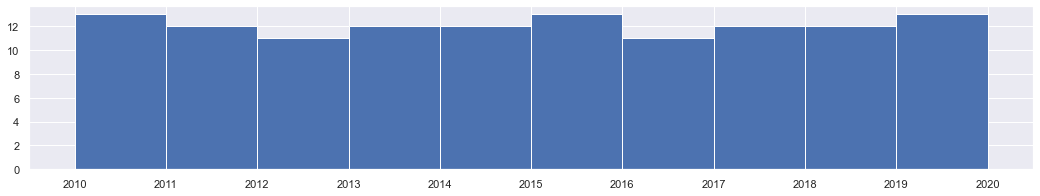

In [336]:
df_Aseguradora1.fecha.hist()

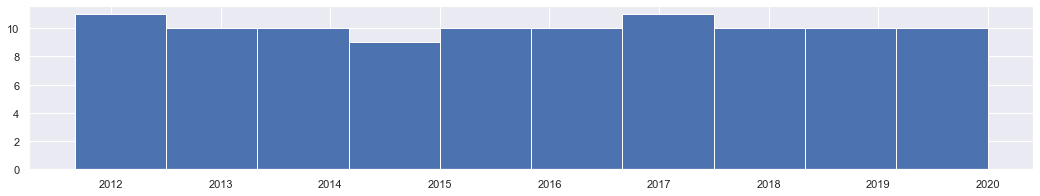

In [334]:
df_Aseguradora2.fecha.hist()

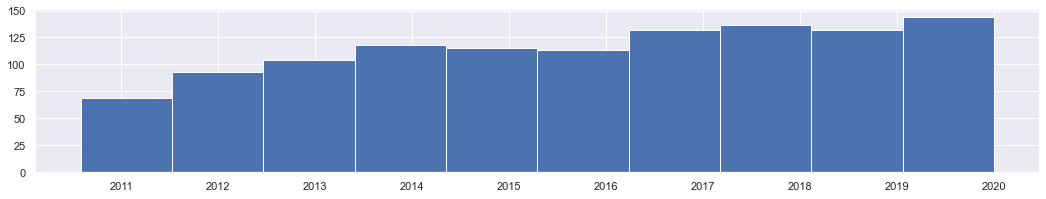

In [335]:
df_Aseguradora3.fecha.hist()

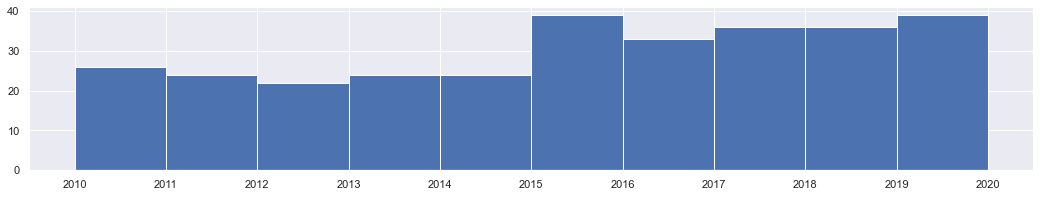

In [337]:
df_Aseguradora4.fecha.hist()

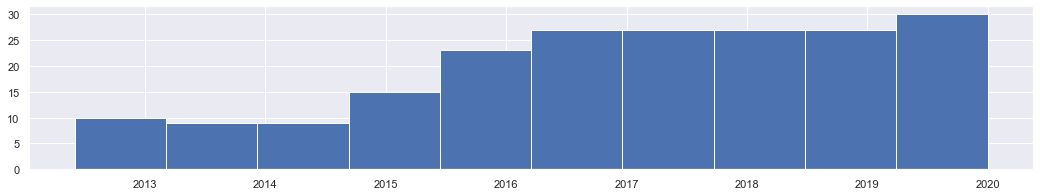

In [338]:
df_Aseguradora5.fecha.hist()

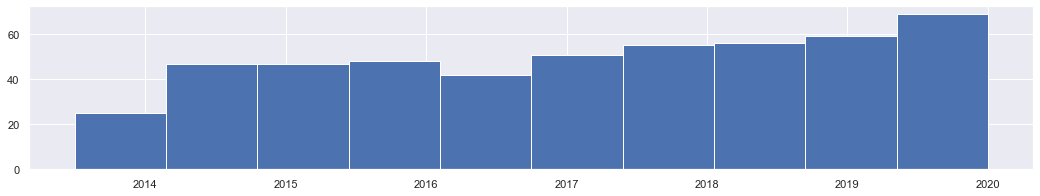

In [339]:
df_Aseguradora6.fecha.hist()

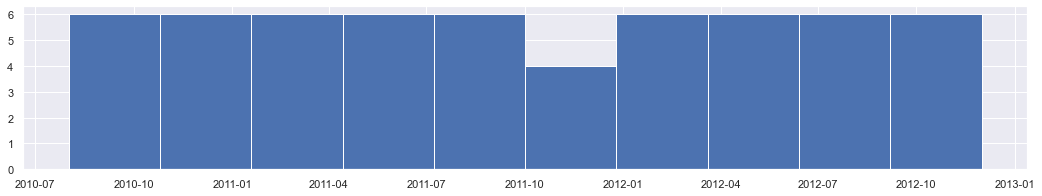

In [340]:
df_Aseguradora7.fecha.hist()

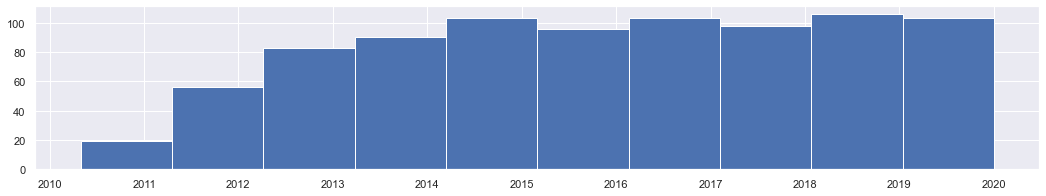

In [341]:
df_Aseguradora8.fecha.hist()

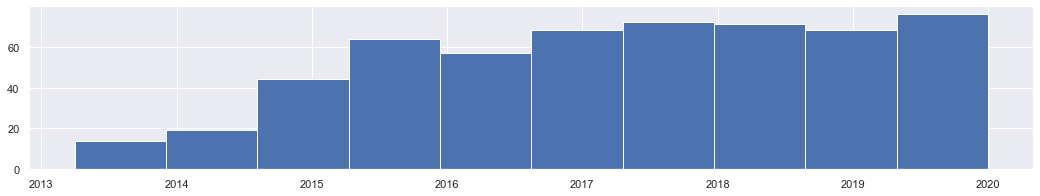

In [342]:
df_Aseguradora9.fecha.hist()

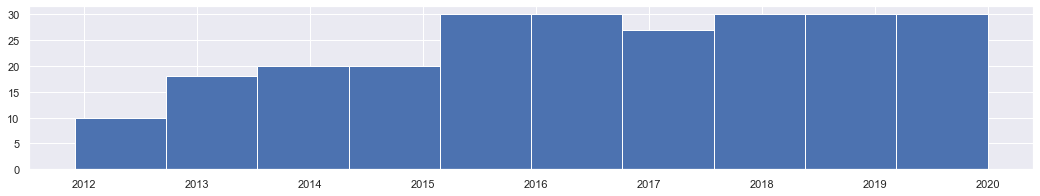

In [343]:
df_Aseguradora10.fecha.hist()

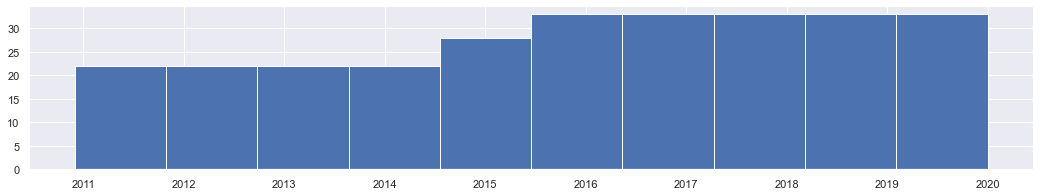

In [344]:
df_Aseguradora11.fecha.hist()

## Preparación de datos
### Cargar y explorar datos de series temporales

In [327]:
ts_df = df_Aseguradora1.copy()

In [328]:
ts_df.head(10)

fecha  primaMensual
0 2010-01-01    22078.1727
1 2010-02-01    39191.8354
2 2010-03-01    26157.2038
3 2010-04-01    21252.8475
4 2010-05-01    32199.6088
5 2010-06-01    30503.4787
6 2010-07-01    29581.1155
7 2010-08-01    31419.6212
8 2010-09-01    23001.3942
9 2010-10-01    23719.4476

In [329]:
ts_df.tail(10)

fecha   primaMensual
111 2019-04-01   49590.268000
112 2019-05-01   33543.639600
113 2019-06-01   42899.103100
114 2019-07-01   48333.004800
115 2019-08-01   51017.698700
116 2019-09-01   45805.114000
117 2019-10-01   37191.220200
118 2019-11-01   37705.778100
119 2019-12-01  255432.615892
120 2020-01-01  252123.202001

In [330]:
ts_df['index'] = pd.to_datetime(ts_df['fecha'])
ts_df.set_index('index', inplace = True)
ts_df.drop(["fecha"], axis = 1, inplace = True) # Serie como pd.DataFrame
ts = ts_df.iloc[:,0] # Serie como pd.Series

In [331]:
ts_df.index[:5]

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01'],
              dtype='datetime64[ns]', name='index', freq=None)

In [125]:
ts_df.head().values

array([[22078.1727],
       [39191.8354],
       [26157.2038],
       [21252.8475],
       [32199.6088]])

In [126]:
ts_df.unstack().head()

              index     
primaMensual  2010-01-01    22078.1727
              2010-02-01    39191.8354
              2010-03-01    26157.2038
              2010-04-01    21252.8475
              2010-05-01    32199.6088
dtype: float64

In [127]:
ts_df.unstack().head().values

array([22078.1727, 39191.8354, 26157.2038, 21252.8475, 32199.6088])

### Crear series de tiempo
#### Pandas representa conjuntos de datos de series de tiempo como una Serie. Una serie es una matriz unidimensional con una etiqueta de tiempo para cada fila.

In [129]:
# create a time series
s = pd.Series(ts_df.unstack().values, index=ts_df.index)

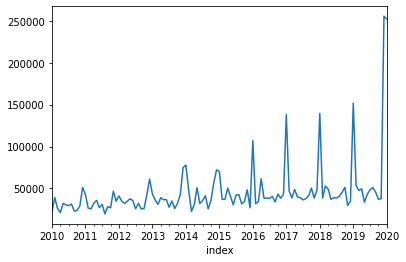

In [130]:
# basic plot
s.plot()

In [132]:
# query a dataset using a date-time index
s[:'2014'].tail(10)

index
2014-03-01    22552.4091
2014-04-01    30694.5941
2014-05-01    50872.2152
2014-06-01    31980.3518
2014-07-01    35538.6311
2014-08-01    41317.9861
2014-09-01    25554.7430
2014-10-01    35652.9305
2014-11-01    56535.7354
2014-12-01    72257.1284
dtype: float64

In [134]:
# keep only data before 2008 
s = s[:'2014']

#### Explore los datos de series temporales

In [135]:
# display first few lines of a time series
s.head()

index
2010-01-01    22078.1727
2010-02-01    39191.8354
2010-03-01    26157.2038
2010-04-01    21252.8475
2010-05-01    32199.6088
dtype: float64

In [136]:
s.index[:5]

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01'],
              dtype='datetime64[ns]', name='index', freq=None)

In [137]:
# mostrar las últimas líneas de una serie temporal
s.tail()

index
2014-08-01    41317.9861
2014-09-01    25554.7430
2014-10-01    35652.9305
2014-11-01    56535.7354
2014-12-01    72257.1284
dtype: float64

In [138]:
# summarize the dimensions of a time series
s.size

60

In [139]:
# calculate descriptive statistics
s.describe()

count       60.000000
mean     35964.873455
std      12503.496910
min      19662.640800
25%      27096.822125
50%      32321.333350
75%      39658.335075
max      77921.536200
dtype: float64

In [140]:
# consultar un conjunto de datos utilizando un índice de fecha y hora
s['2010-06':'2013-06']

index
2010-06-01    30503.4787
2010-07-01    29581.1155
2010-08-01    31419.6212
2010-09-01    23001.3942
2010-10-01    23719.4476
2010-11-01    29160.3618
2010-12-01    51303.2481
2011-01-01    42699.8534
2011-02-01    26532.8957
2011-03-01    25682.3185
2011-04-01    32177.3419
2011-05-01    35815.4333
2011-06-01    27165.0925
2011-07-01    31012.1941
2011-08-01    19662.6408
2011-09-01    28285.7009
2011-10-01    26892.0110
2011-11-01    46797.0070
2011-12-01    34845.2213
2012-01-01    41057.8341
2012-02-01    34996.4053
2012-03-01    32121.0758
2012-04-01    34715.6766
2012-05-01    37669.8232
2012-06-01    35460.7894
2012-07-01    25981.2429
2012-08-01    32338.6411
2012-09-01    25641.0793
2012-10-01    26000.5413
2012-11-01    42212.2805
2012-12-01    61272.6516
2013-01-01    43549.9171
2013-02-01    36299.1192
2013-03-01    31060.8197
2013-04-01    38944.3912
2013-05-01    36646.1488
2013-06-01    36759.9465
dtype: float64

## Ingeniería de funciones básicas
#### Un conjunto de datos de series de tiempo debe transformarse para ser modelado como un problema de aprendizaje supervisado.
### Características de fecha y hora
##### Las características más simples que podemos usar son las características de la fecha / hora de cada observación.

In [141]:
df = pd.DataFrame()
df['year'] = [s.index[i].year for i in range(len(s))]
df['month'] = [s.index[i].month for i in range(len(s))]
df['value'] = s.values.tolist()

In [142]:
df.head()

year  month       value
0  2010      1  22078.1727
1  2010      2  39191.8354
2  2010      3  26157.2038
3  2010      4  21252.8475
4  2010      5  32199.6088

### Características de retraso
##### Las características de retraso son la forma clásica en que los problemas de pronóstico de series temporales se transforman en problemas de aprendizaje supervisado. 
##### El enfoque más simple es predecir el valor la próxima vez (t + 1) dado el valor en el momento actual (t). 
##### El problema de aprendizaje supervisado con valores desplazados tiene el siguiente aspecto:

In [319]:
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
df.head()

t         t+1
0         NaN  22078.1727
1  22078.1727  39191.8354
2  39191.8354  26157.2038
3  26157.2038  21252.8475
4  21252.8475  32199.6088

In [145]:
df.tail()

t         t+1
55  35538.6311  41317.9861
56  41317.9861  25554.7430
57  25554.7430  35652.9305
58  35652.9305  56535.7354
59  56535.7354  72257.1284

### Características de la ventana
##### La adición de características de retraso se llama el método de ventana deslizante, en este caso con un ancho de ventana de 1. 
##### Es como si estuviéramos deslizando nuestro enfoque a lo largo de la serie de tiempo para cada observación con interés solo en lo que está dentro del ancho de la ventana. 
##### Podemos expandir el ancho de la ventana e incluir más características rezagadas.

In [320]:
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(3), values.shift(2), values.shift(1), values], axis=1)
df.columns = ['t-2', 't-1', 't', 't+1']
df.head()

t-2         t-1           t         t+1
0         NaN         NaN         NaN  22078.1727
1         NaN         NaN  22078.1727  39191.8354
2         NaN  22078.1727  39191.8354  26157.2038
3  22078.1727  39191.8354  26157.2038  21252.8475
4  39191.8354  26157.2038  21252.8475  32199.6088

In [148]:
df.tail()

t-2         t-1           t         t+1
55  50872.2152  31980.3518  35538.6311  41317.9861
56  31980.3518  35538.6311  41317.9861  25554.7430
57  35538.6311  41317.9861  25554.7430  35652.9305
58  41317.9861  25554.7430  35652.9305  56535.7354
59  25554.7430  35652.9305  56535.7354  72257.1284

### Rolling Window Statistics

##### Un paso más allá de agregar valores rezagados sin procesar es agregar un resumen de los valores en los pasos de tiempo anteriores. 

##### Podemos calcular estadísticas de resumen a través de los valores en la ventana deslizante e incluirlos como características en nuestro conjunto de datos. 

##### Quizás lo más útil sea la media de los valores anteriores, también llamada laminación media.

In [321]:
values = pd.DataFrame(s.values)
shifted = values.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

df = pd.concat([means, values], axis=1)
df.columns = ['mean(t-1,t)', 't+1']
df.head()

mean(t-1,t)         t+1
0          NaN  22078.1727
1          NaN  39191.8354
2  30635.00405  26157.2038
3  32674.51960  21252.8475
4  23705.02565  32199.6088

In [151]:
df.tail()

mean(t-1,t)         t+1
55  33759.49145  41317.9861
56  38428.30860  25554.7430
57  33436.36455  35652.9305
58  30603.83675  56535.7354
59  46094.33295  72257.1284

In [322]:
values = pd.DataFrame(s.values)
width = 3
shifted = values.shift(width - 1)
window = shifted.rolling(window=width)

df = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df.columns = ['min', 'mean', 'max', 't+1']
df.head()

min          mean         max         t+1
0         NaN           NaN         NaN  22078.1727
1         NaN           NaN         NaN  39191.8354
2         NaN           NaN         NaN  26157.2038
3         NaN           NaN         NaN  21252.8475
4  22078.1727  29142.403967  39191.8354  32199.6088

In [154]:
df.tail()

min          mean         max         t+1
55  30694.5941  37849.053700  50872.2152  41317.9861
56  31980.3518  39463.732700  50872.2152  25554.7430
57  31980.3518  36278.989667  41317.9861  35652.9305
58  25554.7430  34137.120067  41317.9861  56535.7354
59  25554.7430  34175.219867  41317.9861  72257.1284

### Estadísticas de ventana desplegable
##### Otro tipo de ventana que puede ser útil incluye todos los datos anteriores de la serie. 
##### Esto se denomina ventana desplegable y puede ayudar a realizar un seguimiento de los límites de los datos observables.

In [155]:
values = pd.DataFrame(s.values)
window = values.expanding()

df = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df.columns = ['min', 'mean', 'max', 't+1']

In [156]:
df.head()

min          mean         max         t+1
0  22078.1727  22078.172700  22078.1727  22078.1727
1  22078.1727  30635.004050  39191.8354  39191.8354
2  22078.1727  29142.403967  39191.8354  26157.2038
3  21252.8475  27170.014850  39191.8354  21252.8475
4  21252.8475  28175.933640  39191.8354  32199.6088

In [157]:
df.tail()

min          mean         max         t+1
55  19662.6408  35140.926250  77921.5362  41317.9861
56  19662.6408  34972.747596  77921.5362  25554.7430
57  19662.6408  34984.474888  77921.5362  35652.9305
58  19662.6408  35349.750490  77921.5362  56535.7354
59  19662.6408  35964.873455  77921.5362  72257.1284

### Visualización de datos
##### Las series de tiempo se prestan naturalmente a la visualización. 
##### Los gráficos lineales de observaciones a lo largo del tiempo son populares, pero hay un conjunto de otros gráficos que puede usar para obtener más información sobre su problema. 
##### Cuanto más aprenda sobre sus datos, más probabilidades tendrá de desarrollar un mejor modelo de pronóstico.
#### Trazado de línea
##### Quizás la visualización más popular para series de tiempo es el diagrama lineal. 
##### En este gráfico, el tiempo se muestra en el eje x con valores de observación a lo largo del eje y.

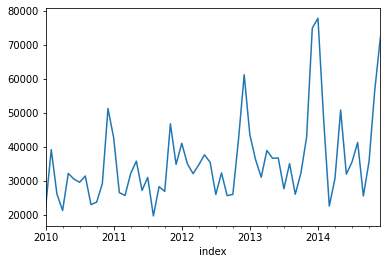

In [158]:
s.plot()

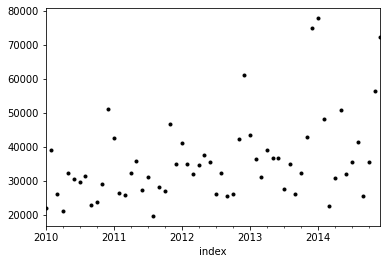

In [159]:
s.plot(style='k.')

### Gráficos de histograma y densidad
##### Otra visualización importante es la distribución de las observaciones mismas. 
##### Esto significa una gráfica de los valores sin el ordenamiento temporal. Algunos métodos de predicción de series temporales lineales suponen una distribución de observaciones con buen comportamiento (es decir, una curva de campana o distribución normal). 
##### Esto se puede verificar explícitamente utilizando herramientas como pruebas de hipótesis estadísticas. 
##### Pero los gráficos pueden proporcionar una primera verificación útil de la distribución de observaciones tanto en observaciones sin procesar como después de que se haya realizado cualquier tipo de transformación de datos.

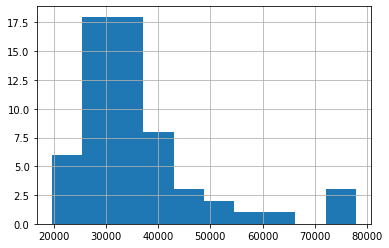

In [160]:
s.hist()

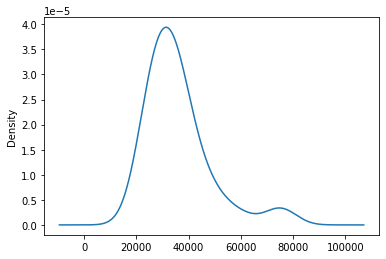

In [161]:
s.plot(kind='kde')

### Parcelas de caja y bigotes
##### Los histogramas y las gráficas de densidad proporcionan información sobre la distribución de todas las observaciones, pero podemos estar interesados en la distribución de valores por intervalo de tiempo. 
##### Otro tipo de diagrama que es útil para resumir la distribución de observaciones es el diagrama de caja y bigotes. 
##### Este gráfico dibuja un cuadro alrededor de los percentiles 25 y 75 de los datos que captura el 50% medio de las observaciones. 
##### Se dibuja una línea en el percentil 50 (la mediana) y se dibujan bigotes encima y debajo del cuadro para resumir la extensión general de las observaciones. 
##### Los puntos se dibujan para valores atípicos fuera de los bigotes o extensiones de los datos.

In [180]:
years, index = [], []
for name, gr in s.groupby(Grouper(freq='A')):
    years.append(gr.values)
    index.append(name.year)
df = pd.DataFrame(years, index=index, columns=range(1,13))

In [181]:
df.tail(10)

1           2           3           4           5           6  \
2010  22078.1727  39191.8354  26157.2038  21252.8475  32199.6088  30503.4787   
2011  42699.8534  26532.8957  25682.3185  32177.3419  35815.4333  27165.0925   
2012  41057.8341  34996.4053  32121.0758  34715.6766  37669.8232  35460.7894   
2013  43549.9171  36299.1192  31060.8197  38944.3912  36646.1488  36759.9465   
2014  77921.5362  48212.7211  22552.4091  30694.5941  50872.2152  31980.3518   

               7           8           9          10          11          12  
2010  29581.1155  31419.6212  23001.3942  23719.4476  29160.3618  51303.2481  
2011  31012.1941  19662.6408  28285.7009  26892.0110  46797.0070  34845.2213  
2012  25981.2429  32338.6411  25641.0793  26000.5413  42212.2805  61272.6516  
2013  27660.5364  35075.0209  26054.5339  32304.0256  42864.5471  74978.3321  
2014  35538.6311  41317.9861  25554.7430  35652.9305  56535.7354  72257.1284

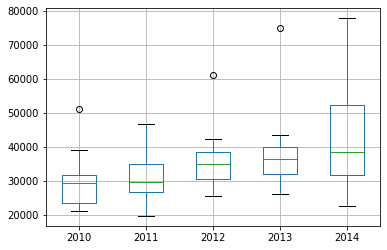

In [182]:
df.head(10).T.boxplot()

##### Comparar las gráficas de caja y bigotes por intervalos consistentes es una herramienta útil. 
##### Dentro de un intervalo, puede ayudar detectar puntos atípicos (puntos arriba o debajo de los bigotes). 
##### A través de intervalos, en este caso años, podemos buscar tendencias de varios años, estacionalidad y otra información estructural que podría modelarse.

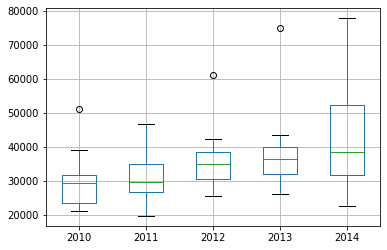

In [183]:
df.tail(10).T.boxplot()

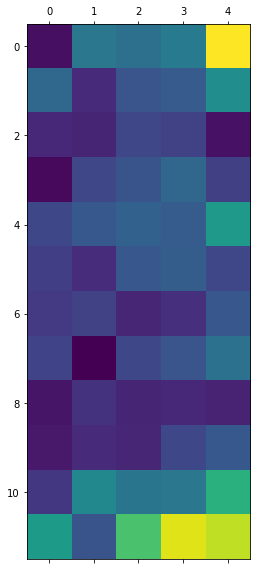

In [184]:
plt.matshow(df.T, interpolation=None, aspect='auto')

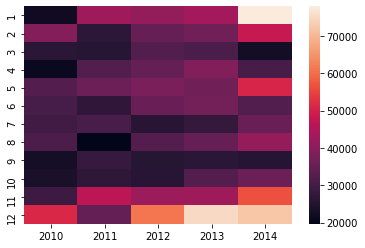

In [185]:
sns.heatmap(df.T)

### Gráficos de dispersión de retraso
##### El modelado de series de tiempo supone una relación entre una observación y la observación previa. Las observaciones previas en una serie de tiempo se llaman retrasos, con la observación en el paso de tiempo anterior llamado retraso = 1, la observación en dos pasos de tiempo atrás retraso = 2, y así sucesivamente. Un tipo de diagrama útil para explorar la relación entre cada observación y un retraso de esa observación se llama diagrama de dispersión. Pandas tiene una función incorporada para exactamente esto llamada diagrama de retraso. Traza la observación en el tiempo t en el eje xy el retraso = 1 observación (t-1) en el eje y.
##### Si los puntos se agrupan a lo largo de una línea diagonal desde la parte inferior izquierda hasta la parte superior derecha de la gráfica, sugiere una relación de correlación positiva.
##### Si los puntos se agrupan a lo largo de una línea diagonal desde la parte superior izquierda a la inferior derecha, sugiere una relación de correlación negativa.
##### Cualquiera de las relaciones es buena, ya que se pueden modelar.
##### Más puntos más apretados en la línea diagonal sugiere una relación más fuerte y más propagación desde la línea sugiere una relación más débil. Una pelota en el medio o una extensión en la trama sugiere una relación débil o nula.

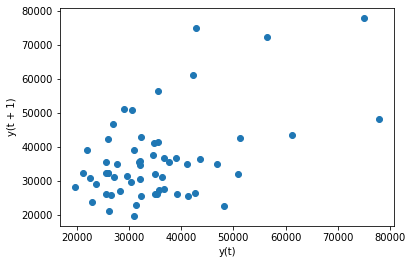

In [188]:
# create a scatter plot
lag_plot(s)

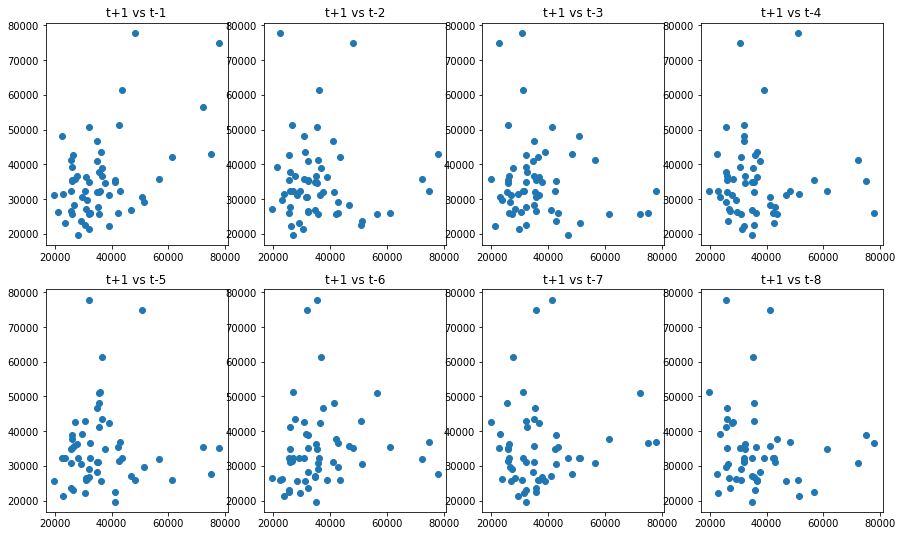

In [175]:
# create multiple scatter plots
values = pd.DataFrame(s.values)
lags = 8
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))

df = pd.concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
df.columns = columns

plt.figure(1, figsize=(15,9))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)

### Gráficos de autocorrelación
##### Podemos cuantificar la fuerza y el tipo de relación entre las observaciones y sus retrasos. En estadística, esto se llama correlación, y cuando se calcula contra valores de retraso en series de tiempo, se llama autocorrelación (autocorrelación). Un valor de correlación calculado entre dos grupos de números, como las observaciones y sus valores de retraso = 1, da como resultado un número entre -1 y 1. El signo de este número indica una correlación negativa o positiva, respectivamente. Un valor cercano a cero sugiere una correlación débil, mientras que un valor más cercano a -1 o 1 indica una correlación fuerte.
##### Los valores de correlación, llamados coeficientes de correlación, se pueden calcular para cada observación y diferentes valores de retraso. Una vez calculado, se puede crear un gráfico para ayudar a comprender mejor cómo cambia esta relación durante el retraso. Este tipo de diagrama se llama diagrama de autocorrelación.

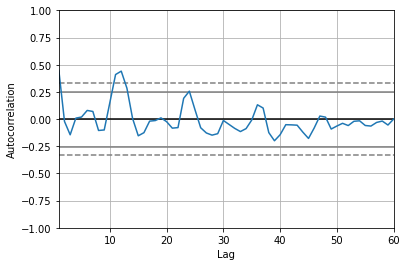

In [191]:
# create an autocorrelation plot
autocorrelation_plot(s)

##### La biblioteca de Statsmodels también proporciona una versión del diagrama de autocorrelación como un diagrama lineal. Traza los retrasos en el eje horizontal y las correlaciones en el eje vertical.

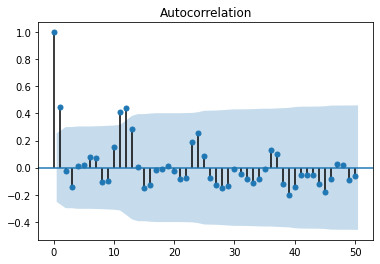

In [194]:
# autocorrelation plot of time series as a line plot
plot_acf(s, lags=50)
plt.show()

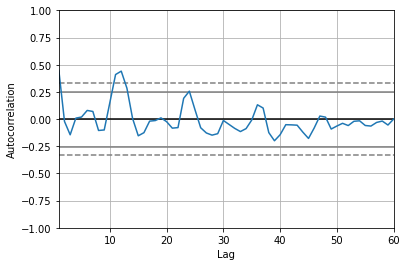

In [195]:
# create an autocorrelation plot, using only the last 100 entries
autocorrelation_plot(s[-100:])

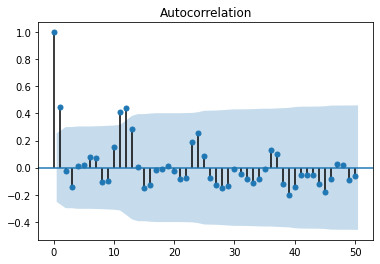

In [196]:
# autocorrelation plot of time series as a line plot
plot_acf(s[-100:], lags=50)
plt.show()

### Moving Average Smoothing
##### El suavizado de la media moviente es una técnica ingenua y efectiva en el pronóstico de series de tiempo. Se puede utilizar para la preparación de datos, ingeniería de características e incluso directamente para hacer predicciones. El suavizado es una técnica aplicada a series de tiempo para eliminar la variación de grano fino entre los pasos de tiempo. La esperanza de suavizar es eliminar el ruido y exponer mejor la señal de los procesos causales subyacentes.

In [197]:
# tail-rolling average transform
rolling = s.rolling(window=3)
rolling_mean = rolling.mean()

In [198]:
rolling_mean.head(10)

index
2010-01-01             NaN
2010-02-01             NaN
2010-03-01    29142.403967
2010-04-01    28867.295567
2010-05-01    26536.553367
2010-06-01    27985.311667
2010-07-01    30761.401000
2010-08-01    30501.405133
2010-09-01    28000.710300
2010-10-01    26046.821000
dtype: float64

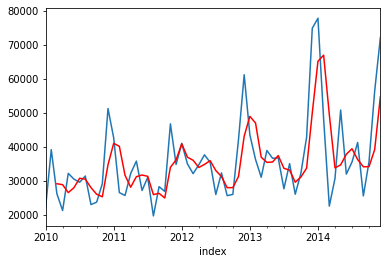

In [199]:
# plot original and transformed dataset
s[-100:].plot()
rolling_mean[-100:].plot(color='red')

### Moving Average as Prediction
##### El valor promedio moviente también se puede usar directamente para hacer predicciones. Es un modelo ingenuo y supone que los componentes de tendencia y estacionalidad de las series de tiempo ya se han eliminado o ajustado. The moving average model para las predicciones se puede usar fácilmente de manera progresiva. A medida que se ponen a disposición nuevas observaciones (por ejemplo, diariamente), el modelo se puede actualizar y hacer una predicción para el día siguiente.

In [200]:
# prepare problem
X = s.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# caminar hacia adelante con el tiempo pasos en la prueba
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = np.sqrt(mean_squared_error(test, predictions))

In [201]:
print('RMSE: %.3f' % rmse)

RMSE: 14019.078


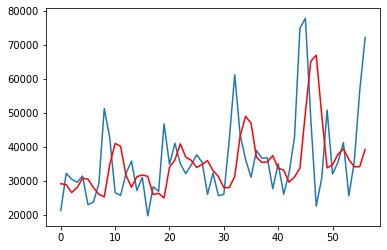

In [202]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

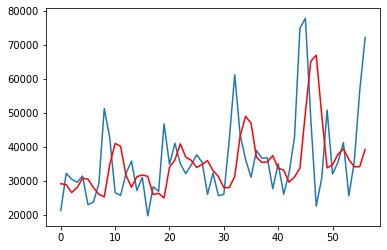

In [203]:
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

### Componentes de series temporales
##### Una abstracción útil para seleccionar métodos de pronóstico es dividir una serie de tiempo en componentes sistemáticos y no sistemáticos.

##### Sistemática: componentes de las series de tiempo que tienen consistencia o recurrencia y pueden describirse y modelarse.
##### No sistemático: componentes de la serie temporal que no se pueden modelar directamente.
##### Se cree que una serie temporal dada consta de tres componentes sistemáticos que incluyen nivel, tendencia, estacionalidad y un componente no sistemático llamado ruido. Estos componentes se definen de la siguiente manera:

##### Nivel: el valor promedio de la serie.
##### Tendencia: el valor creciente o decreciente de la serie.
##### Estacionalidad: el ciclo repetitivo a corto plazo de la serie.
##### Ruido: la variación aleatoria en la serie.

##### Nuestro conjunto de datos de series temporales puede contener una tendencia. Una tendencia es un aumento o disminución continua en la serie a lo largo del tiempo. Puede ser beneficioso identificar, modelar e incluso eliminar información de tendencias de su conjunto de datos de series de tiempo.
##### Los conjuntos de datos de series temporales pueden contener un componente estacional. Este es un ciclo que se repite con el tiempo, como mensual o anual. Este ciclo repetitivo puede oscurecer la señal que deseamos modelar al pronosticar, y a su vez puede proporcionar una señal fuerte a nuestros modelos predictivos. Hay muchos tipos de estacionalidad: hora del día, diaria, semanal, mensual, anual, etc. Identificar si hay un componente de estacionalidad en su problema de series de tiempo es subjetivo. El enfoque más simple para determinar si existe un aspecto de estacionalidad es trazar y revisar sus datos, tal vez a diferentes escalas y con la adición de líneas de tendencia.
##### Una serie temporal en la que se ha eliminado el componente estacional se llama estacional estacional. Si un conjunto de datos no tiene una tendencia o eliminamos con éxito la tendencia, se dice que el conjunto de datos es estacionario.
### Estacionariedad en datos de series temporales
##### Las observaciones en una serie de tiempo estacionaria no dependen del tiempo. Las series de tiempo son estacionarias si no tienen tendencia o efectos estacionales. Las estadísticas de resumen calculadas en las series temporales son consistentes en el tiempo, como la media o la varianza de las observaciones. Cuando una serie temporal es estacionaria, puede ser más fácil modelar. Los métodos de modelado estadístico suponen o requieren que las series de tiempo sean estacionarias para ser efectivas.
#### Comprobar la estacionariedad
##### Existen muchos métodos para verificar si una serie temporal (observaciones directas, residuales, de lo contrario) es estacionaria o no estacionaria.
##### Mire las gráficas: puede revisar una gráfica de series de tiempo de sus datos y verificar visualmente si hay tendencias obvias o estacionalidad.
##### Estadísticas de resumen: puede revisar las estadísticas de resumen de sus datos para temporadas o particiones aleatorias y verificar diferencias obvias o significativas.
##### Pruebas estadísticas: puede usar pruebas estadísticas para verificar si se cumplen o se han violado las expectativas de estacionariedad.

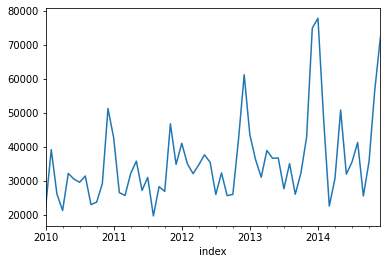

In [204]:
s.plot()

### Augmented Dickey-Fuller test
##### La prueba de Dickey-Fuller aumentada es un tipo de prueba estadística llamada prueba de raíz unitaria. La intuición detrás de una prueba de raíz unitaria es que determina qué tan fuertemente una serie temporal está definida por una tendencia. Utiliza un modelo autorregresivo y optimiza un criterio de información en múltiples valores de retraso diferentes. La hipótesis nula de la prueba es que la serie de tiempo puede ser representada por una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo). La hipótesis alternativa (rechazando la hipótesis nula) es que la serie temporal es estacionaria.

In [207]:
# calculate stationarity test of time series data
X = s.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.156854
p-value: 0.943473
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


##### Podemos ver que nuestro valor estadístico de -0.156854 es menor que el valor de -3.575 al 1%. Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia inferior al 1% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística). Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

### Evaluar modelos
##### El objetivo del pronóstico de series de tiempo es hacer predicciones precisas sobre el futuro. Los métodos rápidos y potentes en los que confiamos en el aprendizaje automático, como el uso de divisiones de prueba, entrenamiento y validación cruzada k-fold, no funcionan en el caso de datos de series temporales. Esto se debe a que ignoran los componentes temporales inherentes al problema.
##### En el pronóstico de series de tiempo, esta evaluación de modelos en datos históricos se denomina backtesting. Analizaremos tres métodos diferentes que puede usar para realizar una prueba de sus modelos de aprendizaje automático en problemas de series temporales:
##### División de prueba - entrenamiento que respeta el orden temporal de las observaciones.
##### Múltiples divisiones Train-Test que respetan el orden temporal de las observaciones.
##### Validación de avance donde un modelo puede actualizarse cada vez que se reciben nuevos datos.
#### Split de entrenamiento - pruebas

In [209]:
# calculate a train-test split of a time series dataset
X = s.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 60
Training Observations: 39
Testing Observations: 21


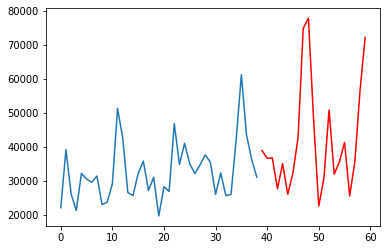

In [210]:
# plot train-test split of time series data
plt.plot(train)
plt.plot([None for i in train] + [x for x in test], color='r')

### Múltiples divisiones de prueba - entrenamiento
#### Podemos repetir el proceso de dividir las series de tiempo en entrenamiento y conjuntos de pruebas varias veces. Esto requerirá la capacitación y evaluación de múltiples modelos, pero este gasto computacional adicional proporcionará una estimación más sólida del rendimiento esperado del método y la configuración elegidos en datos no vistos. Podríamos hacer esto manualmente repitiendo las pruebas de división de train-split tests con diferentes puntos de división.
#### La biblioteca scikit-learn proporciona una serie temporal "validador cruzado" en el módulo TimeSeriesSplit. Proporciona índices de entrenamiento / prueba para dividir muestras de datos de series de tiempo que se observan a intervalos de tiempo fijos, en conjuntos de entrenamiento / prueba. Tenga en cuenta que, a diferencia de los métodos estándar de validación cruzada, los conjuntos de entrenamiento sucesivos son superconjuntos de los anteriores.

Observations: 30
Training Observations: 15
Testing Observations: 15
-----
Observations: 45
Training Observations: 30
Testing Observations: 15
-----
Observations: 60
Training Observations: 45
Testing Observations: 15
-----


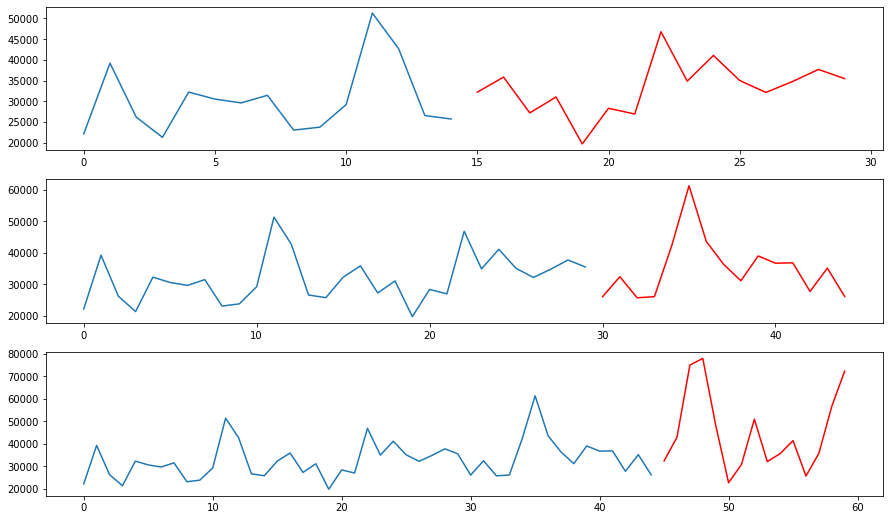

In [213]:
# calculate repeated train-test splits of time series data
X = s.values
splits = TimeSeriesSplit(n_splits=3)
index = 1
plt.figure(1, figsize=(15,9))

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d\n-----' % (len(test)))

    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test], color='r')
    index += 1
plt.show() 

##### El uso de múltiples divisiones de prueba de tren dará como resultado la capacitación de más modelos y, a su vez, una estimación más precisa del rendimiento de los modelos en datos no vistos. Una limitación del enfoque de división de prueba de tren es que los modelos entrenados permanecen fijos a medida que se evalúan en cada evaluación en el conjunto de prueba. Esto puede no ser realista ya que los modelos se pueden volver a entrenar a medida que se hacen disponibles nuevas observaciones diarias o mensuales.
### Walk Forward Validation
##### En la práctica, muy probablemente volveremos a capacitar nuestro modelo a medida que haya nuevos datos disponibles. Esto le daría al modelo la mejor oportunidad para hacer buenos pronósticos en cada paso del tiempo.
#### Hay pocas decisiones que tomar:
##### Número mínimo de observaciones. Primero, debemos seleccionar el número mínimo de observaciones requeridas para entrenar el modelo. Esto puede considerarse como el ancho de la ventana si se usa una ventana deslizante (ver el siguiente punto).
##### Ventana deslizante o desplegable. A continuación, debemos decidir si el modelo se capacitará en todos los datos que tenga disponibles o solo en las observaciones más recientes. Esto determina si se usará una ventana deslizante o desplegable.

In [216]:
# walk forward validation: the train set expanding each time step and the test set fixed at one time step ahead
X = s[-100:].values
n_train = 80
n_records = len(X)

for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

### Modelo de persistencia para pronósticos
##### Establecer una línea de base es esencial en cualquier problema de pronóstico de series temporales. Una línea de base en el rendimiento le da una idea de qué tan bien se desempeñarán todos los otros modelos en su problema. Aquí desarrollaremos un pronóstico de persistencia que luego podemos usar como nivel de rendimiento de referencia en este conjunto de datos de series de tiempo.
#### Se requieren los siguientes pasos:
##### Transforme el conjunto de datos univariado en un problema de aprendizaje supervisado.
##### Establezca el entrenamiento y los conjuntos de datos de prueba para el arnés de prueba.
##### Definir el modelo de persistencia.
##### Haga un pronóstico y establezca un rendimiento de referencia.
##### Revise el ejemplo completo y trace la salida.

In [217]:
# Create lagged dataset
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [218]:
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [219]:
# persistence model
def model_persistence(x):
    return x

In [220]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14019.078


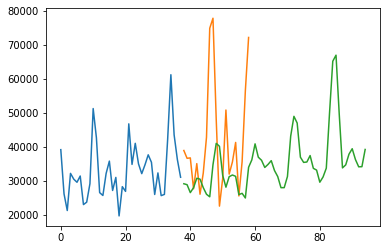

In [221]:
# plot predictions and expected results on the test data
plt.plot(train_y[-50:])
plt.plot([None for i in train_y[-50:]] + [x for x in test_y])
plt.plot([None for i in train_y[-50:]] + [x for x in predictions])

In [224]:
len(predictions)

57

In [229]:
len(test_y)

21

#### Visualizar errores de pronóstico residual
##### Los errores de pronóstico en un problema de pronóstico de series temporales se denominan errores residuales o residuales. Un error residual se calcula como el resultado esperado menos el pronóstico. La exploración cuidadosa de los errores residuales en su problema de predicción de series temporales puede informarle mucho sobre su modelo de pronóstico e incluso sugerir mejoras.

In [230]:
# calculate residuals from the above persistence model
residuals = [test_y[i]-predictions[i] for i in range(len(test_y))]
residuals = pd.DataFrame(residuals)

##### El primer gráfico es observar los errores de pronóstico residuales a lo largo del tiempo como un gráfico lineal. Esperaríamos que la gráfica sea aleatoria alrededor del valor de 0 y no muestre ninguna tendencia o estructura cíclica.

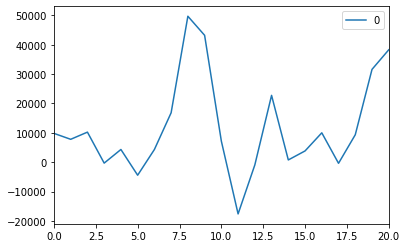

In [231]:
# plot residuals
residuals.plot()

##### Podemos calcular estadísticas resumidas sobre los errores residuales. Principalmente, estamos interesados en el valor medio de los errores residuales. Un valor cercano a cero sugiere que no hay sesgo en los pronósticos, mientras que los valores positivos y negativos sugieren un sesgo positivo o negativo en los pronósticos realizados. Es útil saber acerca de un sesgo en los pronósticos, ya que puede corregirse directamente en los pronósticos antes de su uso o evaluación.

In [232]:
residuals.describe()

0
count     21.000000
mean   11715.827398
std    16728.714586
min   -17626.256633
25%      755.320567
50%     7778.853233
75%    16817.726100
max    49684.597567

##### Los gráficos se pueden usar para comprender mejor la distribución de errores más allá de las estadísticas de resumen. Esperaríamos que los errores de pronóstico se distribuyan normalmente alrededor de una media cero.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x149e694d0>]],
      dtype=object)

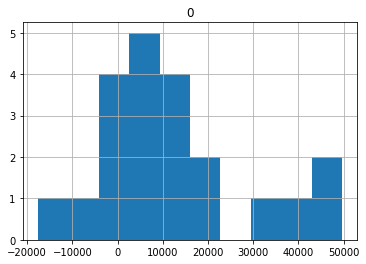

In [233]:
# histograms plot
residuals.hist()

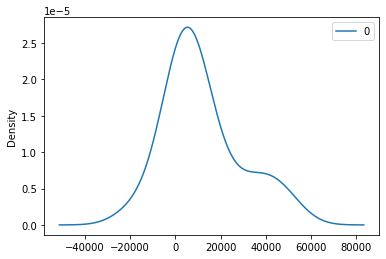

In [234]:
# density plot
residuals.plot(kind='kde')

#### Parcela Q-Q residual
##### Una gráfica Q-Q, o gráfica cuantil, compara dos distribuciones y puede usarse para ver cuán similares o diferentes son. El gráfico Q-Q se puede utilizar para verificar rápidamente la normalidad de la distribución de errores residuales. Los valores se ordenan y comparan con una distribución gaussiana idealizada. La comparación se muestra como un diagrama de dispersión (teórico en el eje xy observado en el eje y) donde una coincidencia entre las dos distribuciones se muestra como una línea diagonal desde la parte inferior izquierda a la parte superior derecha de la gráfica.

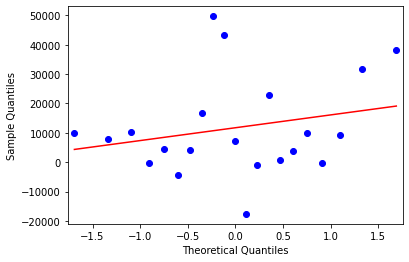

In [240]:
sm.qqplot(residuals, line='r')
plt.show()

#### Gráfico de autocorrelación residual
##### No esperaríamos que haya ninguna correlación entre los residuos. Esto se demostraría si los puntajes de autocorrelación estuvieran por debajo del umbral de significancia (líneas horizontales discontinuas y punteadas en la gráfica). Una autocorrelación significativa en la gráfica residual sugiere que el modelo podría estar haciendo un mejor trabajo al incorporar la relación entre observaciones y observaciones rezagadas, llamada autorregresión.

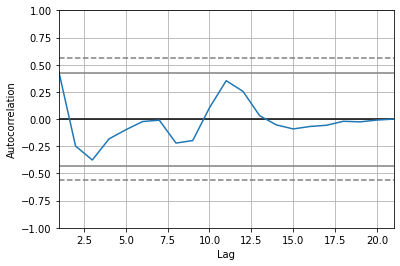

In [241]:
autocorrelation_plot(residuals)

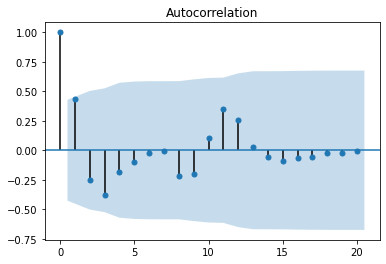

In [242]:
# autocorrelation plot of residuals as a line plot
plot_acf(residuals, lags=20)
plt.show()

### Replantear problemas de pronóstico de series temporales
##### Hay muchas formas de replantear el problema de pronóstico que pueden simplificar el problema de predicción y exponer potencialmente más o diferente información para modelar. Un replanteamiento en última instancia puede dar lugar a pronósticos mejores y / o más sólidos.
#### Enmarcados de clasificación
##### La clasificación implica predecir salidas categóricas o de etiquetas (como alta, media y baja). Por ejemplo, podemos pronosticar si un cambio en el valor mínimo será pequeño o grande, o si el nuevo valor será menor o mayor que el valor actual.

In [243]:
# Create lagged dataset
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [244]:
def make_discrete(row):
   if row['t+1'] < 0:
      return 'low'
   elif row['t+1'] > 3:
      return 'high'
   else:
      return 'medium'

In [245]:
# apply the above function to reassign t+1 values
df['t+1'] = df.apply(lambda row: make_discrete(row), axis=1)

In [246]:
# Randomly sample 10 elements from the dataframe
df.sample(n=10)

t   t+1
16  32177.3419  high
41  36646.1488  high
34  26000.5413  high
56  41317.9861  high
43  27660.5364  high
2   39191.8354  high
35  42212.2805  high
49  77921.5362  high
38  36299.1192  high
14  26532.8957  high

#### Time Horizon Framings
##### Forecast the minimum value for the next 3 months.
##### Forecast the maximum value relative to the average from the past 12 months.
##### Forecast the month in the next year that will have the lowest value.

In [247]:
# create lagged dataset
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values, values.shift(-1), values.shift(-2)], axis=1)
df.columns = ['t', 't+1', 't+2', 't+3']

In [248]:
df.head()

t         t+1         t+2         t+3
0         NaN  22078.1727  39191.8354  26157.2038
1  22078.1727  39191.8354  26157.2038  21252.8475
2  39191.8354  26157.2038  21252.8475  32199.6088
3  26157.2038  21252.8475  32199.6088  30503.4787
4  21252.8475  32199.6088  30503.4787  29581.1155

##### Ahora podemos definir el problema como: dada la tasa de interés mínima del día anterior, pronostique el valor mínimo para los próximos 3 días.
#### Previsión
##### Elegimos el Modelo de persistencia como nuestra línea de base de rendimiento de pronóstico y obtuvimos el error cuadrático medio de RMSE = 0.187. Ahora nos gustaría mejorar este resultado.
#### Modelo de autorregresión
##### La autorregresión es un modelo de serie temporal que utiliza observaciones de pasos de tiempo anteriores como entrada a una ecuación de regresión para predecir el valor en el siguiente paso de tiempo. Es una idea muy simple que puede generar pronósticos precisos sobre una serie de problemas de series de tiempo.

In [249]:
# split dataset
X = s.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

##### Un modelo de autorregresión supone que las observaciones en los pasos de tiempo actual y anterior son útiles para predecir el valor en el siguiente paso de tiempo. Esta relación entre variables se llama correlación. Si ambas variables cambian en la misma dirección, esto se llama correlación positiva. Si las variables se mueven en direcciones opuestas a medida que cambian los valores (por ejemplo, una sube y la otra baja), esto se llama correlación negativa.

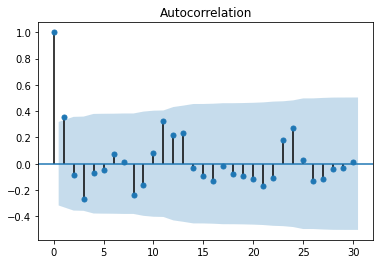

In [250]:
plot_acf(train, lags=30)
plt.show()

##### Un modelo de autorregresión es un modelo de regresión lineal que utiliza variables rezagadas como variables de entrada. La biblioteca Statsmodels proporciona un modelo de autorregresión que selecciona automáticamente un valor de retraso apropiado mediante pruebas estadísticas y entrena un modelo de regresión lineal. Se proporciona en la clase AR.

In [254]:
# train autoregression
model = AR(train)
model_fit = model.fit()

#### Use el modelo para hacer predicciones para una semana

In [256]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [255]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 9
Coefficients: [ 4.61447657e+04  5.49491978e-01 -2.17730241e-01 -4.48548030e-01
  4.28142716e-01 -6.01893252e-01  9.06832943e-02  2.42289247e-01
 -6.66915845e-01  2.37294130e-01]


In [257]:
test_period = 7
for i in range(test_period):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test[:test_period], predictions[:test_period]))

predicted=29769.360895, expected=38944.391200
predicted=21924.924586, expected=36646.148800
predicted=31635.470654, expected=36759.946500
predicted=33664.456178, expected=27660.536400
predicted=24967.395601, expected=35075.020900
predicted=26920.464846, expected=26054.533900
predicted=37100.062987, expected=32304.025600


In [258]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8359.074


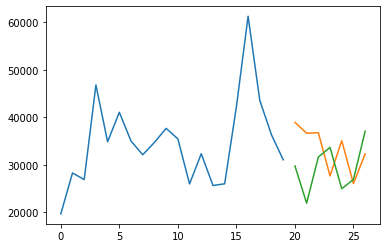

In [259]:
# plot predictions and expected results on the test data
plt.plot(train_y[-20:])
plt.plot([None for i in train_y[-20:]] + [x for x in test_y[:test_period]])
plt.plot([None for i in train_y[-20:]] + [x for x in predictions[:test_period]])

##### Obviamente, queremos reconstruir el modelo después de cada día a medida que los nuevos datos estén disponibles.
#### Avance de validación
##### La API de Statsmodels no facilita la actualización del modelo a medida que hay nuevas observaciones disponibles. Una forma sería volver a entrenar el modelo AR cada día a medida que estén disponibles nuevas observaciones, y ese puede ser un enfoque válido, si no computacionalmente costoso. Una alternativa sería utilizar los coeficientes aprendidos y hacer predicciones manualmente. Esto requiere que se mantenga el historial de observaciones previas y que los coeficientes se recuperen del modelo y se usen en la ecuación de regresión para generar nuevos pronósticos.

In [260]:
# split dataset
X = s.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

In [262]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [263]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = []
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = np.sqrt(mean_squared_error(test, predictions))

In [264]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15359.862


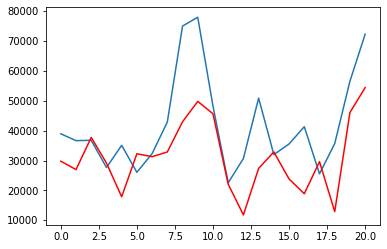

In [265]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

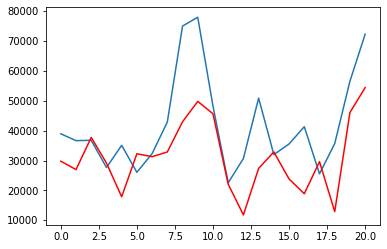

In [266]:
# zoom plot
plt.plot(test[-100:])
plt.plot(predictions[-100:], color='red')
plt.show()

#### Modelo de previsión de persistencia
##### Repasemos los resultados del Modelo de persistencia.

In [267]:
# create lagged dataset
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [268]:
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [269]:
# persistence model
predictions = [x for x in test_X]

In [270]:
# skill of persistence model
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15319.293


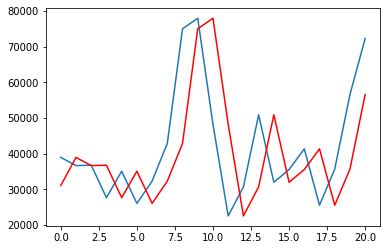

In [271]:
# plot
plt.plot(test_y)
plt.plot(predictions, color='red')

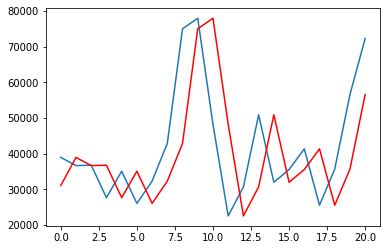

In [272]:
# zoom plot
plt.plot(test_y[-100:])
plt.plot(predictions[-100:], color='red')
plt.show()

### Modelos de moviendo media para pronósticos
##### La diferencia entre lo que se esperaba y lo que se predijo se llama error residual. Los errores residuales de los pronósticos en una serie temporal proporcionan otra fuente de información que podemos modelar. Los errores residuales en sí mismos forman una serie temporal que puede tener una estructura temporal. Se puede usar un modelo de autorregresión simple de esta estructura para predecir el error de pronóstico, que a su vez se puede usar para corregir pronósticos. Este tipo de modelo se llama modelo de moviendo promedio, el mismo nombre pero muy diferente del suavizado de moviendo promedio.
#### Autorregresión de error residual
##### Podemos modelar las series temporales de error residual utilizando un modelo de autorregresión. Este es un modelo de regresión lineal que crea una suma lineal ponderada de términos de error residual rezagados.
##### Podemos usar el modelo de autorregresión (AR) provisto por la biblioteca Statsmodels. Partiendo del modelo de persistencia (consulte la sección anterior), primero podemos entrenar el modelo sobre los errores residuales calculados en el conjunto de datos de entrenamiento.

In [273]:
# create lagged dataset
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [274]:
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [275]:
# persistence model on training set
train_pred = [x for x in train_X]

In [276]:
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

In [278]:
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [279]:
print('Lag=%d, Coef=%s' % (window, coef))

Lag=9, Coef=[ 1.35624423e+03 -3.15286739e-01 -4.09677222e-01 -8.33494915e-01
 -2.43553472e-01 -7.09414757e-01 -4.93246313e-01 -6.25420327e-02
 -6.58011026e-01 -3.06405059e-01]


##### El modelo de autorregresión requiere el error residual de los 17 pasos de tiempo anteriores. Por lo tanto, debemos tener a mano estos valores. A medida que avanzamos por el conjunto de datos de prueba paso a paso haciendo predicciones y estimando el error, podemos calcular el error residual real y actualizar los valores de retraso de la serie temporal (historial) del error residual para poder calcular el error en el siguiente paso.

In [281]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions, expected_error = [], []

for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]

    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=3569.958558, expected error=7883.571500
predicted error=-7704.832687, expected error=-2298.242400
predicted error=8956.216263, expected error=113.797700
predicted error=-1117.429828, expected error=-9099.410100
predicted error=-4934.271710, expected error=7414.484500
predicted error=6477.361929, expected error=-9020.487000
predicted error=16990.253837, expected error=6249.491700
predicted error=5345.963436, expected error=10560.521500
predicted error=4139.510806, expected error=32113.785000
predicted error=-17789.268778, expected error=2943.204100
predicted error=-19111.713579, expected error=-29708.815100
predicted error=-14316.684834, expected error=-25660.312000
predicted error=-757.820544, expected error=8142.185000
predicted error=8628.842512, expected error=20177.621100
predicted error=345.518248, expected error=-18891.863400
predicted error=7261.345197, expected error=3558.279300
predicted error=-2520.598222, expected error=5779.355000
predicted error=5870.517526

##### Este es un modelo de pronóstico de avance, o un pronóstico continuo. Terminamos con una serie temporal del error de pronóstico residual del conjunto de datos del tren y un error residual pronosticado en el conjunto de datos de prueba. Podemos trazar estos y tener una idea rápida de cuán hábil es el modelo para predecir el error residual.

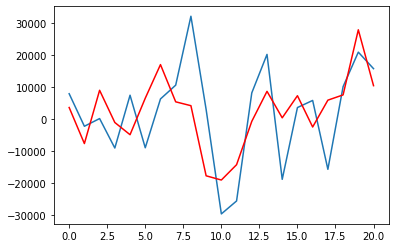

In [282]:
# plot predicted error
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

#### Predicciones correctas con un modelo de residuos
##### Un modelo de error residual pronosticado es interesante, pero también puede ser útil para hacer mejores predicciones. Con una buena estimación del error de pronóstico en un paso de tiempo, podemos hacer mejores predicciones. Por ejemplo, podemos agregar el error de pronóstico esperado a una predicción para corregirlo y, a su vez, mejorar la habilidad del modelo.

In [283]:
# create lagged dataset
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [284]:
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [285]:
# persistence model on training set
train_pred = [x for x in train_X]

In [286]:
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

In [287]:
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()

window = model_fit.k_ar
coef = model_fit.params

In [288]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]

    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    #print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error
rmse = np.sqrt(mean_squared_error(test_y, predictions))

In [289]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 12715.694


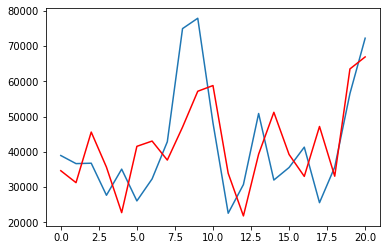

In [290]:
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')

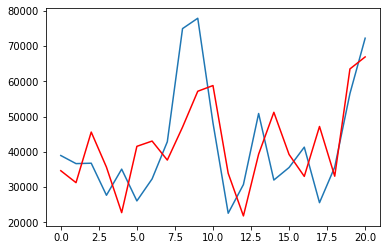

In [291]:
# zoom plot
plt.plot(test_y[-100:])
plt.plot(predictions[-100:], color='red')
plt.show()

#### Modelo ARIMA para Pronósticos
##### El modelo de media móvil integrada autorregresiva, o ARIMA para abreviar, es un modelo estadístico estándar para el pronóstico y análisis de series temporales. Un modelo ARIMA es una clase de modelo estadístico para analizar y pronosticar datos de series temporales.
##### ARIMA es un acrónimo que significa Modelo de media móvil integrado autorregresivo. Este acrónimo es descriptivo y captura los aspectos clave del modelo en sí:
##### AR: autorregresión. Un modelo que usa la relación dependiente entre una observación y cierto número de observaciones rezagadas.
##### I: Integrado El uso de la diferenciación de observaciones sin procesar (es decir, restar una observación de una observación en el paso de tiempo anterior) para hacer estacionarias las series de tiempo.
##### MA: Media móvil. Un modelo que utiliza la dependencia entre una observación y errores residuales de un modelo de promedio móvil aplicado a observaciones rezagadas.
##### Los parámetros del modelo ARIMA se definen de la siguiente manera:
##### p: El número de observaciones de retraso incluidas en el modelo, también llamado el orden de retraso.
##### d: El número de veces que las observaciones sin procesar se diferencian, también llamado grado de diferenciación.
##### q: El tamaño de la ventana de promedio móvil, también llamado el orden del promedio móvil.
##### Comencemos con algo simple. Ajustaremos un modelo ARIMA a todo el conjunto de datos de Shampoo Sales y revisaremos los errores residuales. Primero, ajustamos un modelo ARIMA (5,1,0). Esto establece el valor de retraso en 5 para la autorregresión, usa un orden de diferencia de 1 para hacer estacionarias las series de tiempo y usa un modelo de promedio móvil de 0.

In [295]:
# fit model
model = ARIMA(s, order=(5,1,0))
model_fit = model.fit(disp=0)

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [296]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -628.943
Method:                       css-mle   S.D. of innovations          10207.603
Date:                Fri, 20 Mar 2020   AIC                           1271.885
Time:                        20:10:34   BIC                           1286.428
Sample:                    02-01-2010   HQIC                          1277.562
                         - 12-01-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.4991    549.813      0.810      0.418    -632.115    1523.113
ar.L1.D.y     -0.1447      0.128     -1.128      0.259      -0.396       0.107
ar.L2.D.y     -0.4885      0.132     -3.704      0.0

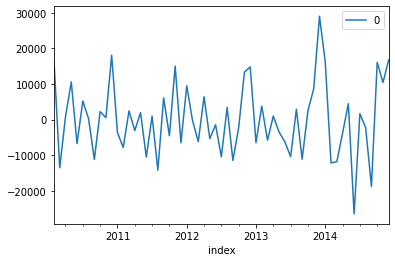

In [297]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

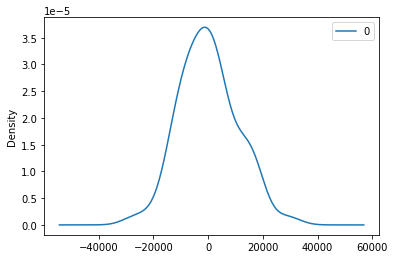

In [298]:
# density plot of residuals
residuals.plot(kind='kde')

[(-2.0, 2.0)]

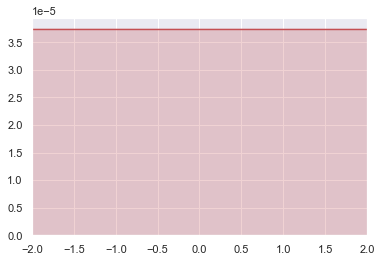

In [299]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals.values), shade=True, color="r").set(xlim=(-2, 2))

In [300]:
# summary stats of residuals
residuals.describe()

0
count     59.000000
mean      70.156940
std    10429.094621
min   -26511.220031
25%    -6517.126579
50%      250.103158
75%     5675.228473
max    29061.059020

#### Modelo ARIMA de pronóstico continuo
##### Podemos dividir el conjunto de datos de entrenamiento en conjuntos de entrenamiento y prueba, usar el conjunto de entrenamiento para ajustar el modelo y generar una predicción para cada elemento en el conjunto de prueba.

In [301]:
# split into train and test sets
X = s.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

##### Se requiere un pronóstico continuo dada la dependencia de las observaciones en los pasos de tiempo anteriores para la diferenciación y el modelo AR. Una forma cruda de realizar este pronóstico continuo es recrear el modelo ARIMA después de recibir cada nueva observación. Realizamos un seguimiento manual de todas las observaciones en una lista llamada historial que se siembra con los datos de entrenamiento y a la que se agregan nuevas observaciones en cada iteración.

In [302]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

##### Podemos calcular una puntuación final de error cuadrático medio (RMSE) para las predicciones, proporcionando un punto de comparación para otras configuraciones de ARIMA.

In [303]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14912.872


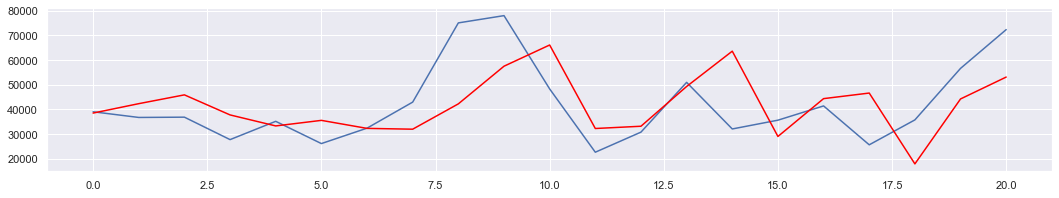

In [304]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test)
plt.plot(predictions, color='red')

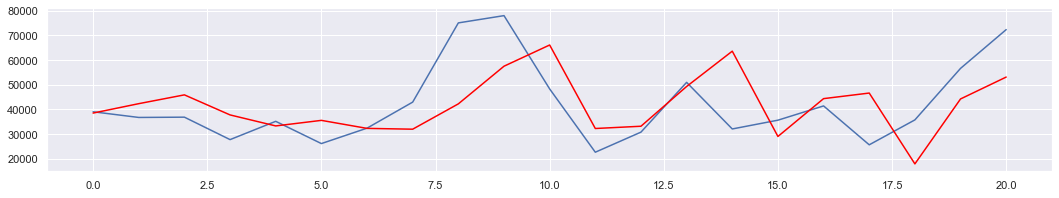

In [305]:
# zoom plot
plt.plot(test_y[-100:])
plt.plot(predictions[-100:], color='red')
plt.show()

#### Hiperparámetros de modelo ARIMA de búsqueda de cuadrícula

In [306]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [307]:
# evaluate parameters
p = 3
d = 1
q = 0
order = (p, d, q)
evaluate_arima_model(s.values, order)

14947.977374014697

In [308]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [309]:
import warnings
warnings.filterwarnings("ignore")

In [310]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1]

evaluate_models(s.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=17624.165
ARIMA(0, 0, 1) RMSE=14696.168
ARIMA(0, 1, 0) RMSE=15410.310
ARIMA(0, 1, 1) RMSE=19277.037
ARIMA(1, 0, 0) RMSE=15404.320
ARIMA(1, 0, 1) RMSE=14680.310
ARIMA(1, 1, 0) RMSE=15970.168
ARIMA(1, 1, 1) RMSE=15316.822
ARIMA(2, 0, 0) RMSE=14433.759
ARIMA(2, 0, 1) RMSE=14630.053
ARIMA(2, 1, 0) RMSE=15216.642
Best ARIMA(2, 0, 0) RMSE=14433.759


##### Pronóstico continuo con el modelo ARIMA seleccionado: validación de avance
##### ARIMA (2, 0, 0) funcionó mejor y lo seleccionamos para nuestro modelo final.

In [311]:
# split into train and test sets
X = s.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

In [312]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

In [313]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14434.515


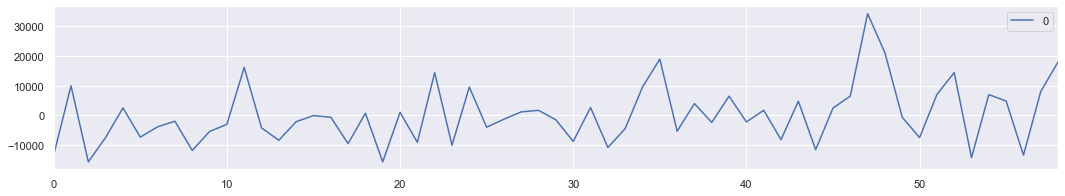

In [314]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

[(-2.0, 2.0)]

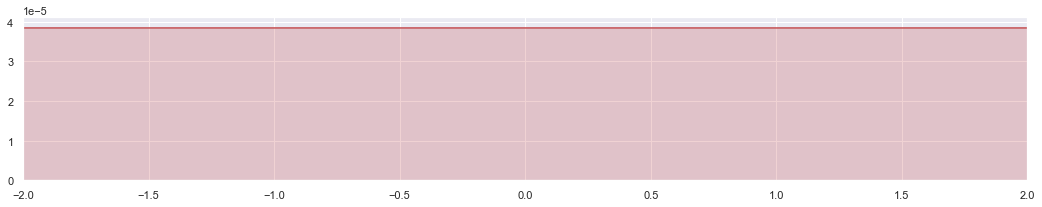

In [315]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals.values), shade=True, color="r").set(xlim=(-2, 2))

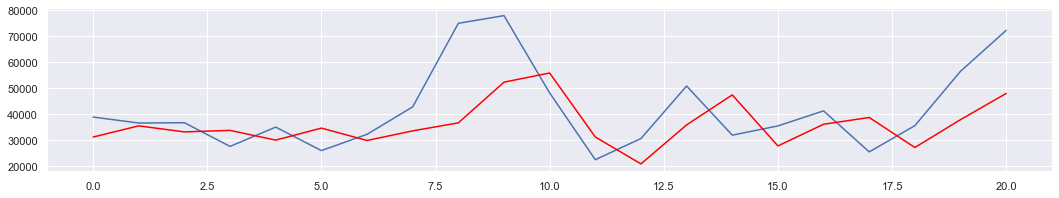

In [316]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test)
plt.plot(predictions, color='red')

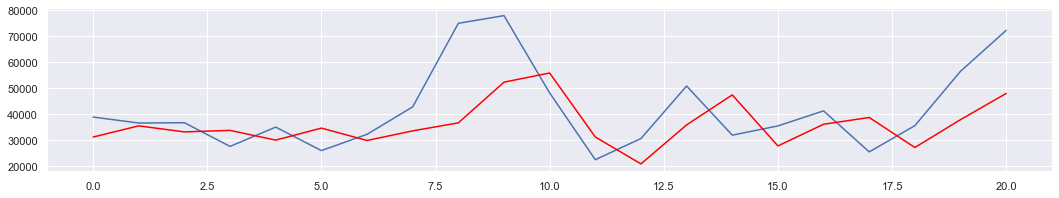

In [317]:
# zoom plot
plt.plot(test_y[-100:])
plt.plot(predictions[-100:], color='red')
plt.show()

##### Repasemos rápidamente qué parte de la serie de tiempo estábamos evaluando.

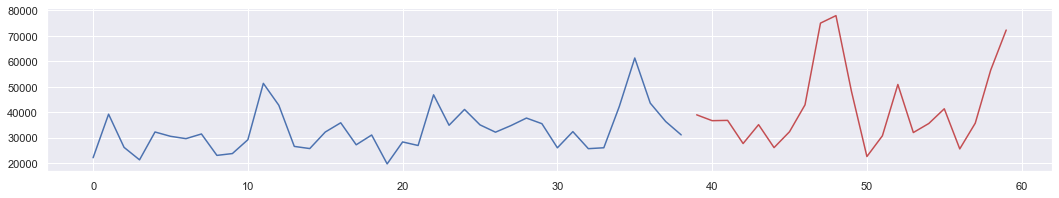

In [318]:
# plot train-test split of time series data
plt.plot(train)
plt.plot([None for i in train] + [x for x in test], color='r')